# <b><u> Project Title : Online Retail Customer Segmentation. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **GitHub Link:**



In [124]:
#imorting important libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

# setting max display column limit to 30
pd.set_option("display.max_columns", 30)

# #set style
# # plt.style.use('seaborn')
# sns.set()


# # setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
# plt.rcParams["axes.titlesize"] = 25
# plt.rcParams["axes.titleweight"] = 'bold'
# plt.rcParams['xtick.labelsize']=15
# plt.rcParams['ytick.labelsize']=15
# plt.rcParams["axes.labelsize"] = 20
# plt.rcParams["legend.fontsize"] = 15
# plt.rcParams["legend.title_fontsize"] = 15

import warnings
warnings.filterwarnings('ignore')
from numpy import math

In [125]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
file_path='/content/Online Retail (1).csv'

In [127]:
# Read The Datset "Online Retail"
# The DatFile sometime wont readable due to its containt for encoding do "encoding = ISO-8859-1"
# Use Panda Library To read The CSV file
# .head() helps to read top 5 record of dataset
retail_df=pd.read_csv(file_path,sep=",",encoding="ISO-8859-1")
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom

In [128]:
# shape of dataset
retail_df.shape

(61879, 8)

# **Data Wrangling:**

In [129]:
# checking the datatypes and null values in dataset
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61879 entries, 0 to 61878
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    61879 non-null  object 
 1   StockCode    61879 non-null  object 
 2   Description  61716 non-null  object 
 3   Quantity     61878 non-null  float64
 4   InvoiceDate  61878 non-null  object 
 5   UnitPrice    61878 non-null  float64
 6   CustomerID   38377 non-null  float64
 7   Country      61878 non-null  object 
dtypes: float64(3), object(5)
memory usage: 3.8+ MB


### **Observations**
* ***Datatype of InvoiceDate is object need to convert it into datatime.***
* ***If InvoiceNo starts with C means it's a cancellation. We need to drop this entries.***
* ***There are null values in CustomerID and Description.***

In [130]:
# Let's check the null values count.
retail_df.isnull().sum().sort_values(ascending=False)

CustomerID     23502
Description      163
Quantity           1
InvoiceDate        1
UnitPrice          1
Country            1
InvoiceNo          0
StockCode          0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

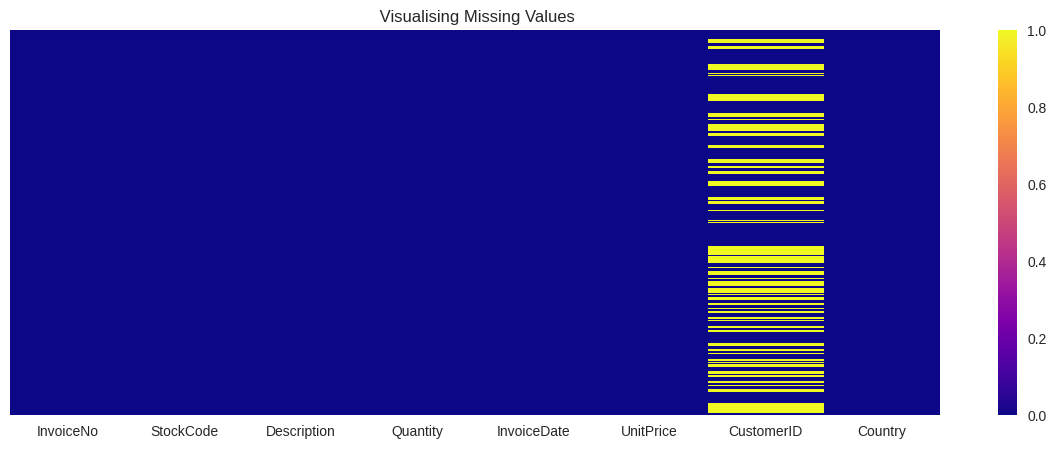

In [131]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(retail_df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

## **Observations**
### ***Missing values in CustomerID and Description columns.***
### ***CustomerID is our identification feature so if its missing means other wont help us in analysis***
### ***Dropping that all missing datapoints***

In [132]:
retail_df.dropna(inplace=True)

In [133]:
retail_df.shape

(38377, 8)

***Our data got reduced.So we have 8 featurs and 406829 datapoints***

In [134]:
retail_df.describe()

Quantity     UnitPrice    CustomerID
count  38377.000000  38377.000000  38377.000000
mean      11.867707      3.242555  15389.989916
std      540.121772      8.354409   1765.282293
min   -74215.000000      0.000000  12346.000000
25%        2.000000      1.250000  13993.000000
50%        4.000000      2.100000  15370.000000
75%       12.000000      3.750000  17019.000000
max    74215.000000   1126.000000  18283.000000

* ***Here we can see that min value for Quantity column is negative.***
* ***UnitPrice has 0 as min value***
* ***Need to Explore these columns***

In [135]:
# dataframe have negative valiues in quantity.
#Here we observed that Invoice number starting with C has negative values and as per description of the data those are cancelations. so we need to drop this entries.
retail_df[retail_df['Quantity']<0]

InvoiceNo StockCode                         Description  Quantity  \
141     C536379         D                            Discount      -1.0   
154     C536383    35004C     SET OF 3 COLOURED  FLYING DUCKS      -1.0   
235     C536391     22556      PLASTERS IN TIN CIRCUS PARADE      -12.0   
236     C536391     21984    PACK OF 12 PINK PAISLEY TISSUES      -24.0   
237     C536391     21983    PACK OF 12 BLUE PAISLEY TISSUES      -24.0   
...         ...       ...                                 ...       ...   
59911   C541415    85123A  WHITE HANGING HEART T-LIGHT HOLDER      -1.0   
59912   C541415     22464         HANGING METAL HEART LANTERN      -1.0   
59955   C541416     22327   ROUND SNACK BOXES SET OF 4 SKULLS      -1.0   
59956   C541418     22809             SET OF 6 T-LIGHTS SANTA     -12.0   
61624   C541433     23166      MEDIUM CERAMIC TOP STORAGE JAR  -74215.0   

            InvoiceDate  UnitPrice  CustomerID         Country  
141    01-12-2010 09:41      27.50     14527.0  United Kingdom  
154    01-12-2010 09:49       4.65     15311.0  United Kingdom  
235    01-12-2010 10:24       1.65     17548.0  United Kingdom  
236    01-12-2010 10:24       0.29     17548.0  United Kingdom  
237    01-12-2010 10:24       0.29     17548.0  United Kingdom  
...                 ...        ...         ...             ...  
59911  17-01-2011 16:20       2.55     14292.0  United Kingdom  
59912  17-01-2011 16:20       1.65     14292.0  United Kingdom  
59955  17-01-2011 16:23       2.95     14606.0  United Kingdom  
59956  17-01-2011 16:45       2.55     13883.0  United Kingdom  
61624  18-01-2011 10:17       1.04     12346.0  United Kingdom  

[995 rows x 8 columns]

In [136]:
# changing the datatype to str
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype('str')

In [137]:
# also If InvoiceNo starts with C means it's a cancellation. We need to drop this entries.
retail_df=retail_df[~retail_df['InvoiceNo'].str.contains('C')]

In [138]:
# Checking how many values are present for unitprice==0
# almost 40 values are present so will drop this values
len(retail_df[retail_df['UnitPrice']==0])

6

In [139]:
# taking unitprice values greater than 0.
retail_df=retail_df[retail_df['UnitPrice']>0]
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom

In [140]:
retail_df.describe()

Quantity     UnitPrice    CustomerID
count  37376.000000  37376.000000  37376.000000
mean      14.654859      3.143831  15400.204249
std      386.965250      5.334390   1767.561948
min        1.000000      0.070000  12346.000000
25%        2.000000      1.250000  14016.000000
50%        5.000000      1.975000  15379.000000
75%       12.000000      3.750000  17033.000000
max    74215.000000    295.000000  18283.000000

In [141]:
retail_df.shape

(37376, 8)

# **Feature Engineering**

In [142]:
# Converting InvoiceDate to datetime. InvoiceDate is in format of 01-12-2010 08:26.
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"], format="%d-%m-%Y %H:%M")

In [143]:
retail_df["year"] = retail_df["InvoiceDate"].apply(lambda x: x.year)
retail_df["month_num"] = retail_df["InvoiceDate"].apply(lambda x: x.month)
retail_df["day_num"] = retail_df["InvoiceDate"].apply(lambda x: x.day)
retail_df["hour"] = retail_df["InvoiceDate"].apply(lambda x: x.hour)
retail_df["minute"] = retail_df["InvoiceDate"].apply(lambda x: x.minute)

In [144]:
# extracting month from the Invoice date
retail_df['Month']=retail_df['InvoiceDate'].dt.month_name()

In [145]:
# extracting day from the Invoice date
retail_df['Day']=retail_df['InvoiceDate'].dt.day_name()

In [146]:
retail_df['TotalAmount']=retail_df['Quantity']*retail_df['UnitPrice']

In [147]:
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

          InvoiceDate  UnitPrice  CustomerID         Country  year  month_num  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010         12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010         12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   

   day_num  hour  minute     Month        Day  TotalAmount  
0        1     8      26  December  Wednesday        15.30  
1        1     8      26  December  Wednesday        20.34  
2        1     8      26  December  Wednesday        22.00  
3        1     8      26  December  Wednesday        20.34  
4        1     8      26  December  Wednesday        20.34

# **EDA(Exploratory Data Analysis)**

In [148]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'minute', 'Month', 'Day', 'TotalAmount'],
      dtype='object')

In [149]:
top_10_product=retail_df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).head(10)
top_10_product

Product_name  Count
0  WHITE HANGING HEART T-LIGHT HOLDER    299
1            REGENCY CAKESTAND 3 TIER    199
2               HEART OF WICKER SMALL    165
3         HAND WARMER BABUSHKA DESIGN    160
4        SCOTTIE DOG HOT WATER BOTTLE    155
5              JAM MAKING SET PRINTED    150
6               HEART OF WICKER LARGE    146
7    RETROSPOT HEART HOT WATER BOTTLE    144
8          CHOCOLATE HOT WATER BOTTLE    142
9     PAPER CHAIN KIT 50'S CHRISTMAS     141

## ***Top 10 items in terms of description(Name)***

Text(0.5, 1.0, 'Top 10 products')

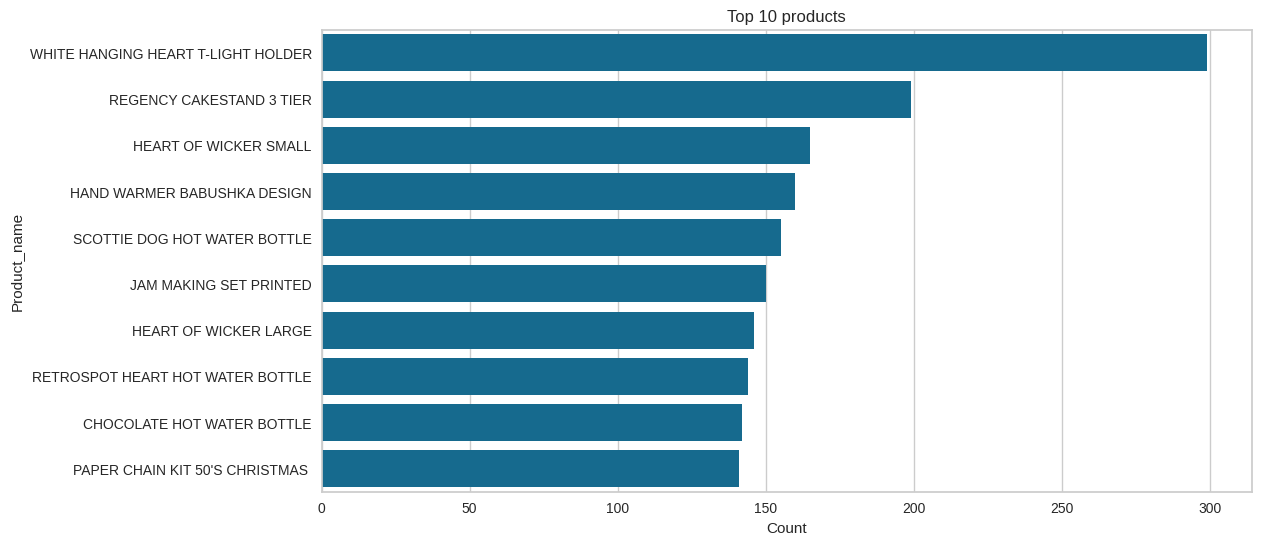

In [150]:
# top 10 product in terms of description
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_product['Count'],y=top_10_product['Product_name'])
plt.title('Top 10 products')

### **Observations**
* ***WHITE HANGING HEART T-LIGHT HOLDER	is the highest selling product almost 2018 units were sold***
* ***REGENCY CAKESTAND 3 TIER is the 2nd highest selling product almost 1723 units were sold***

## ***Bottom 10 items in terms of description(Name)***

In [151]:
bottom_10_product=retail_df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).tail(10)
bottom_10_product

Product_name  Count
2557          PARTY TIME DESIGN FLANNEL      1
2558  CAKES AND RABBITS DESIGN FLANNEL       1
2559                  VIP HOLIDAY PURSE      1
2560         CARTOON  PENCIL SHARPENERS      1
2561                    BLUE TILED TRAY      1
2562          JIGSAW TOADSTOOLS 3 PIECE      1
2563      JIGSAW TREE WITH WATERING CAN      1
2564         ENVELOPE 50 BLOSSOM IMAGES      1
2565       BLOSSOM IMAGES GIFT WRAP SET      1
2566                 FLAG OF ST GEORGE       1

Text(0.5, 1.0, 'Bottom 10 products')

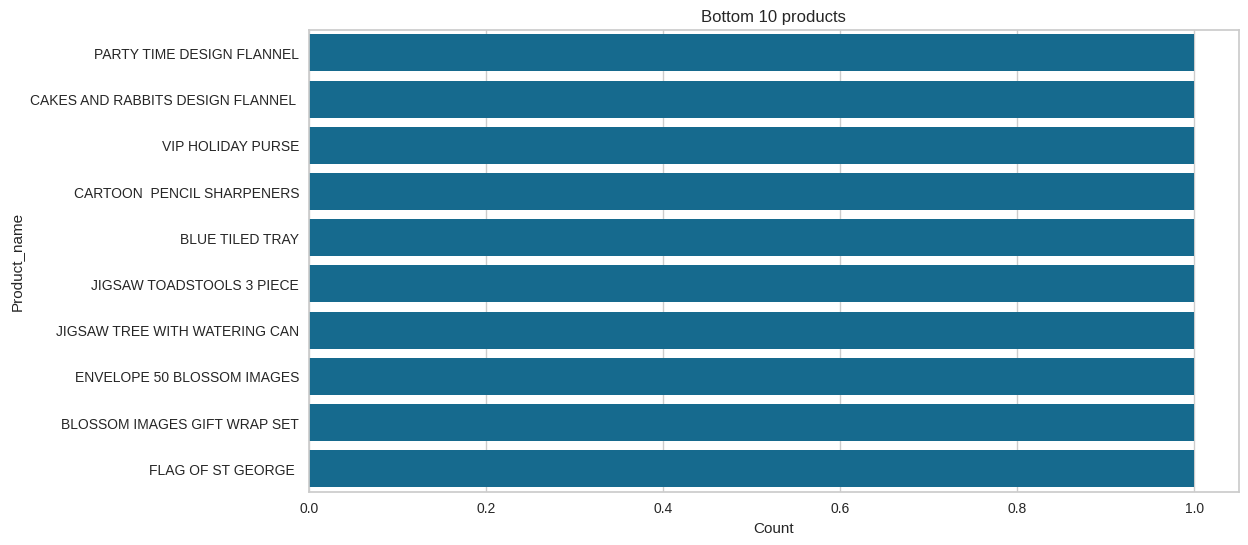

In [152]:
# bottom 10 product in terms of description
plt.figure(figsize=(12,6))
sns.barplot(x=bottom_10_product['Count'],y=bottom_10_product['Product_name'])
plt.title('Bottom 10 products')

## ***Top 10 items in terms of StockCode.***

In [153]:
top_10_StockCodes=retail_df['StockCode'].value_counts().reset_index().rename(columns={'index':'StockCode','StockCode':'Count'}).head(10)
top_10_StockCodes

StockCode  Count
0    85123A    299
1     22423    199
2     22469    165
3     22834    160
4     22111    155
5     22961    150
6     22470    146
7     21485    144
8     22112    142
9     22086    141

Text(0.5, 1.0, 'Top 10 products in terms of Stock Code')

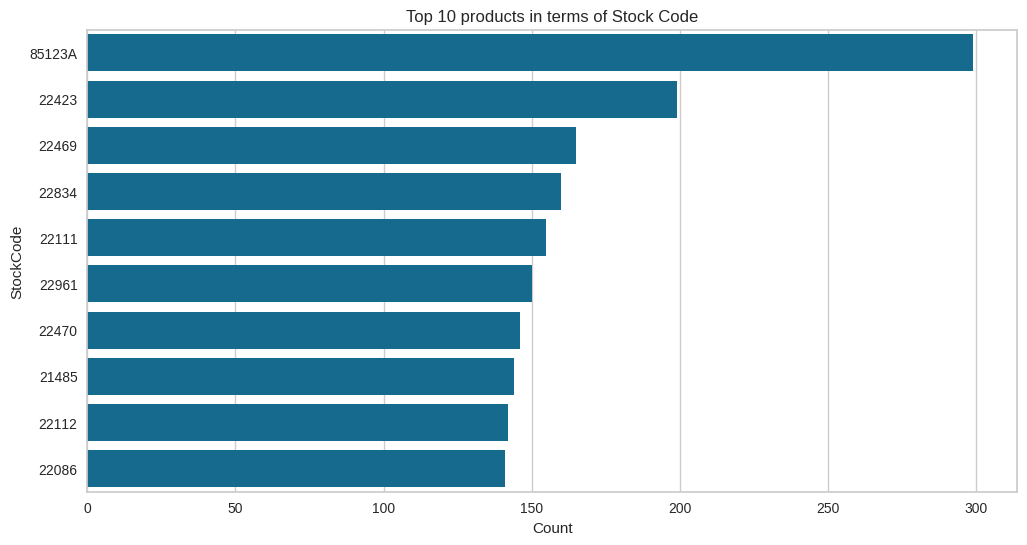

In [154]:
# top 10 product in terms of StcokCode
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_StockCodes['Count'],y=top_10_StockCodes['StockCode'])
plt.title('Top 10 products in terms of Stock Code')

# **Observations**
* ***StockCode-85123Ais the first highest selling product.***
* ***StockCode-22423 is the 2nd highest selling product.***

In [155]:
top_10_customers=retail_df['CustomerID'].value_counts().reset_index().rename(columns={'index':'CustomerID','CustomerID':'Products_purchasing_Count'}).head(10)
top_10_customers

CustomerID  Products_purchasing_Count
0     12748.0                        693
1     17841.0                        460
2     14606.0                        390
3     15311.0                        367
4     14911.0                        314
5     17850.0                        297
6     13089.0                        257
7     18118.0                        250
8     13081.0                        243
9     15039.0                        206

Text(0.5, 1.0, 'Top 10 frequent Customers.')

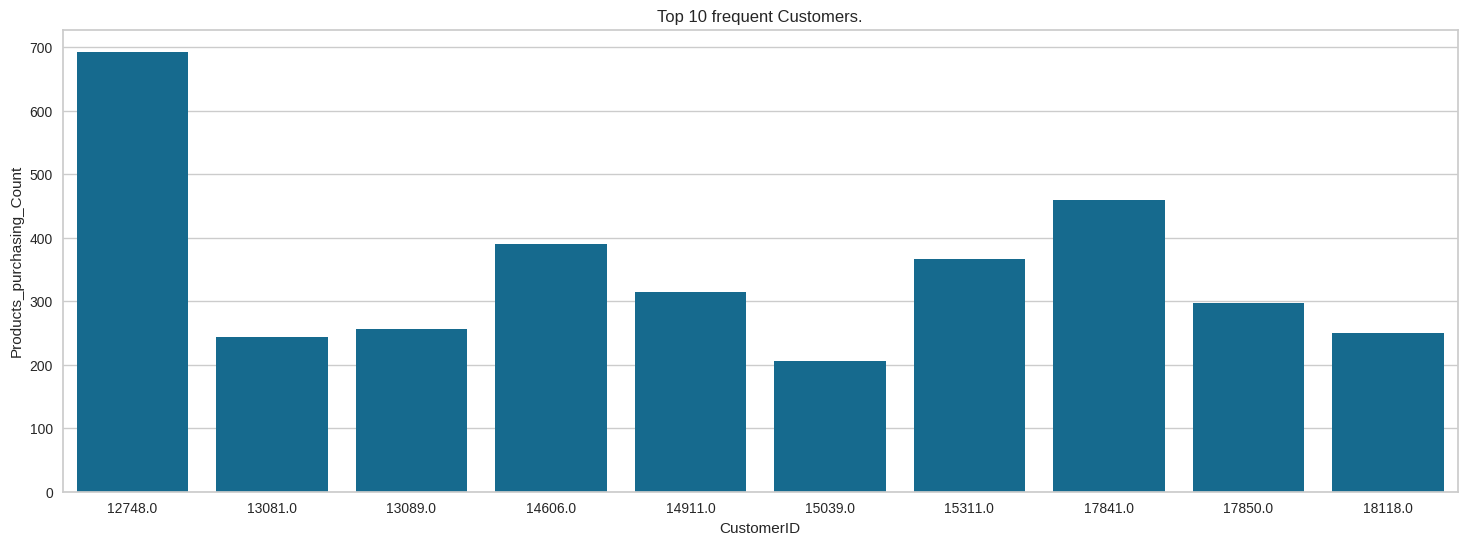

In [156]:
# Top 10 frequent Customers
plt.figure(figsize=(18,6))
sns.barplot(x=top_10_customers['CustomerID'],y=top_10_customers['Products_purchasing_Count'].head(10))
plt.title('Top 10 frequent Customers.')

# **Observation**
* ***CustomerID- 17841 had purchased highest number of products***
* ***CustomerID-14911 is the 2nd higest customer who purchased the most the products***


In [157]:
top_5_countries=retail_df['Country'].value_counts().reset_index().rename(columns={'index':'Country','Country':'Customer_count'})
top_5_countries

Country  Customer_count
0    United Kingdom           33645
1           Germany             906
2            France             854
3              EIRE             397
4             Spain             301
5          Portugal             204
6       Netherlands             151
7            Norway             147
8           Belgium             126
9         Australia             122
10            Italy             110
11           Cyprus              99
12            Japan              65
13      Switzerland              49
14           Sweden              39
15        Lithuania              35
16           Poland              33
17          Iceland              31
18          Denmark              20
19  Channel Islands              17
20          Finland              17
21          Austria               8

Text(0.5, 1.0, 'Top 5 Countries based on highest number of customers')

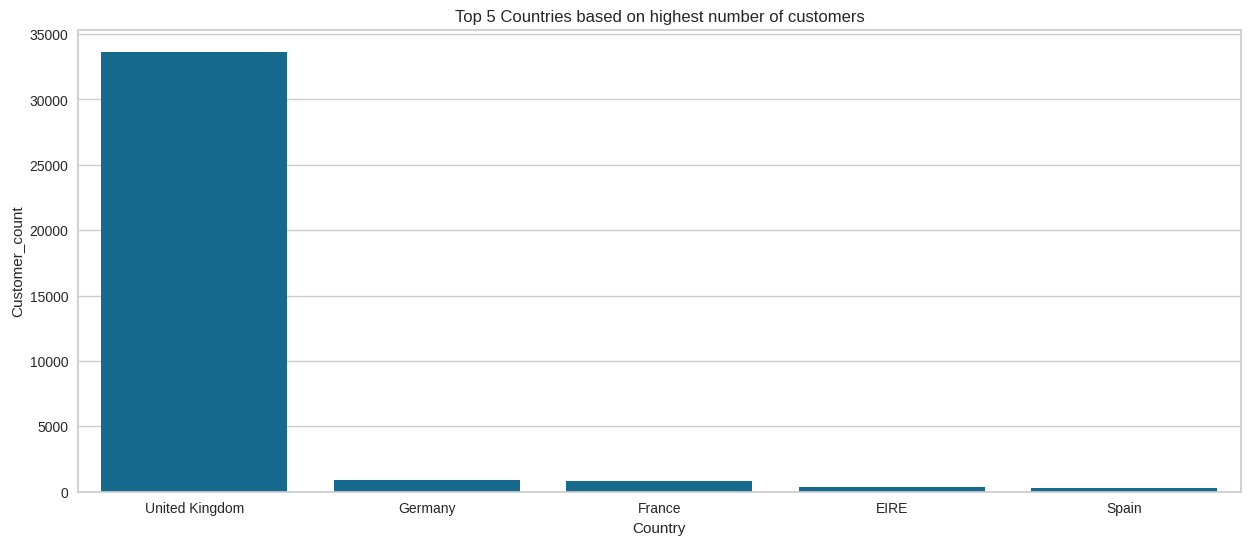

In [158]:
# top 5 countries where max sell happens.
plt.figure(figsize=(15,6))
sns.barplot(x=top_5_countries['Country'].head(5),y=top_5_countries['Customer_count'].head(5))
plt.title('Top 5 Countries based on highest number of customers')

# **Observation**
* ***UK has highest number of customers***
* ***Germany,France and IreLand has almost equal number of customers***

Text(0.5, 1.0, 'Top 5 Countries based on least number of customers ')

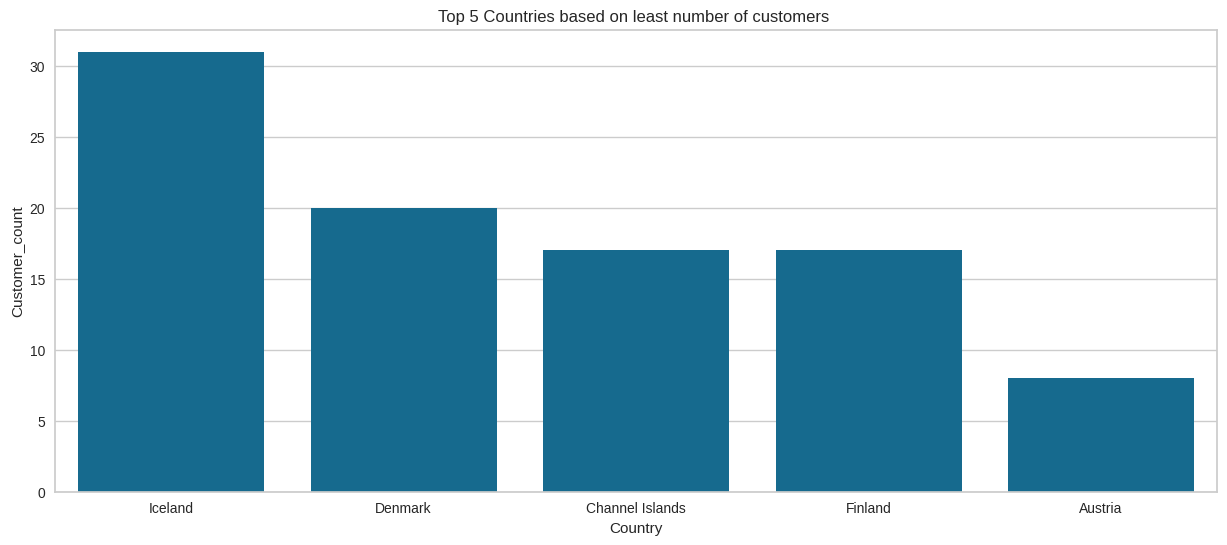

In [159]:
# top 5 countries where max sell happens.
plt.figure(figsize=(15,6))
sns.barplot(x=top_5_countries['Country'].tail(5),y=top_5_countries['Customer_count'].tail(5))
plt.title('Top 5 Countries based on least number of customers ')

# **Observations**
* ***There are very less customers from Saudi Arabia***
* ***Bahrain is the 2nd Country having least number of customers***

In [160]:
sales_in_month=retail_df['Month'].value_counts().reset_index().rename(columns={'index':'Month','Month':'Sales_count'})
sales_in_month

Month  Sales_count
0  December        26157
1   January        11219

Text(0.5, 1.0, 'Sales count in different Months ')

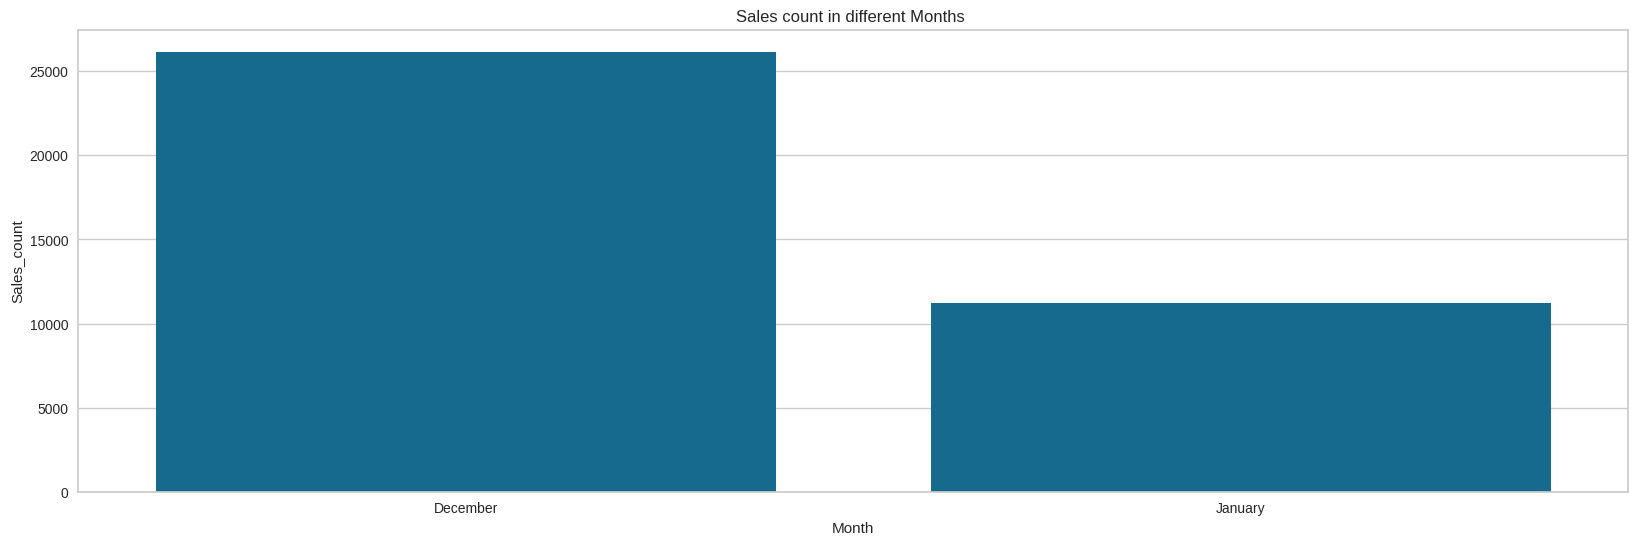

In [161]:
# Sales count in different months.
plt.figure(figsize=(20,6))
sns.barplot(x=sales_in_month['Month'],y=sales_in_month['Sales_count'])
plt.title('Sales count in different Months ')

##**Observations**
* ***Most of the sale happened in Novmenber month.***
* ***February Month had least sales.***

In [162]:
sales_on_day_basis=retail_df['Day'].value_counts().reset_index().rename(columns={'index':'Day',"Day":'Sale_count'})
sales_on_day_basis

Day  Sale_count
0   Thursday        7741
1  Wednesday        7345
2     Sunday        6377
3     Monday        5793
4     Friday        5078
5    Tuesday        5042

Text(0.5, 1.0, 'Sales count on different Days ')

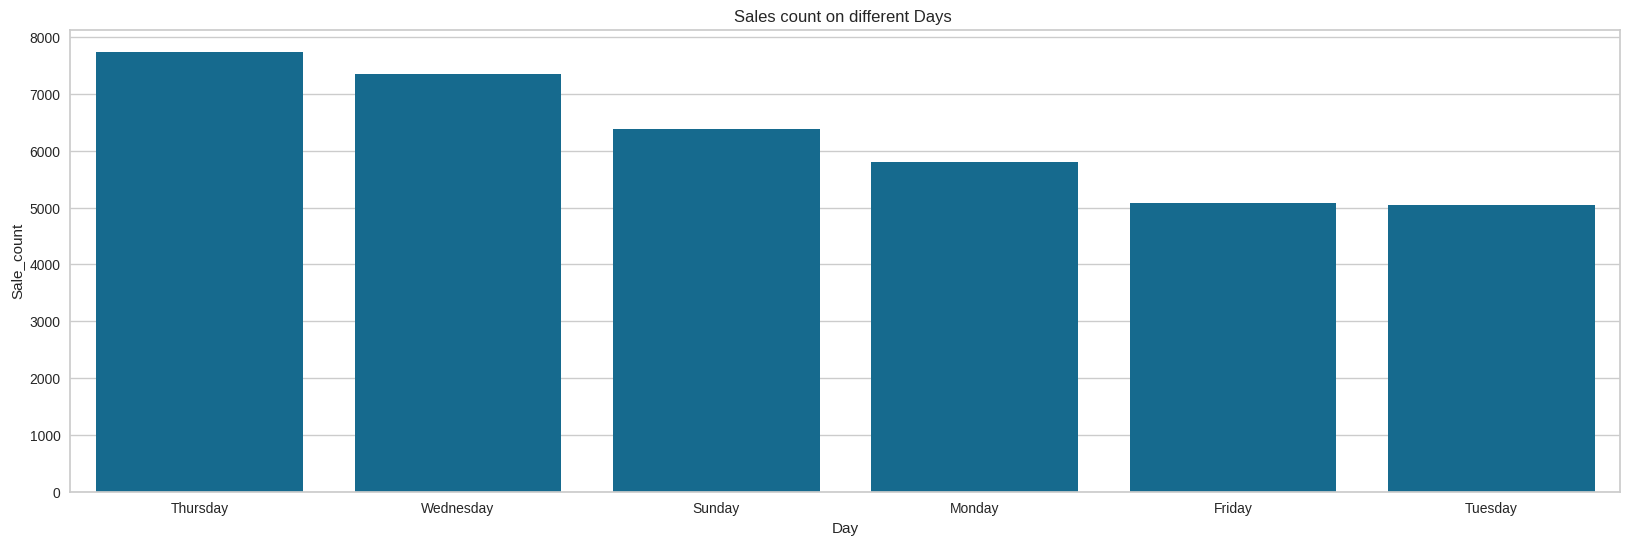

In [163]:
# Sales count on different days.
plt.figure(figsize=(20,6))
sns.barplot(x=sales_on_day_basis['Day'],y=sales_on_day_basis['Sale_count'])
plt.title('Sales count on different Days ')

## **Observation**
* ***Sales On Thursdays are very high.***
* ***Sales On Fridays are very less***

In [164]:
retail_df['hour'].unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  7, 18, 19, 20])

In [165]:
def time(time):
  if (time==6 or time==7 or time==8 or time==9 or time==10 or time==11) :
    return'Morning'
  elif (time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [166]:
retail_df['Day_time_type']=retail_df['hour'].apply(time)

In [167]:
sales_timing=retail_df['Day_time_type'].value_counts().reset_index().rename(columns={'index':'Day_time_type','Day_time_type':'Sales_count'})
sales_timing

Day_time_type  Sales_count
0     Afternoon        25846
1       Morning        10807
2       Evening          723

Text(0.5, 1.0, 'Sales count in different day timings')

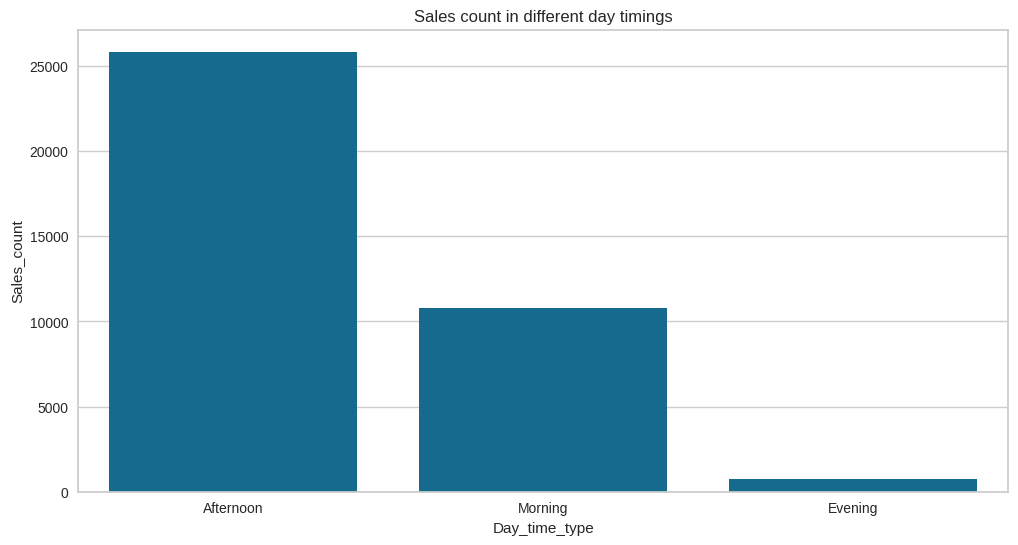

In [168]:
# Sales count on different days.
plt.figure(figsize=(12,6))
sns.barplot(x=sales_timing['Day_time_type'],y=sales_timing['Sales_count'])
plt.title('Sales count in different day timings')

## **Observations**

* ***Most of the sales happens in the afternoon.***
* ***Least sales happens in the evening.***

In [169]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'minute', 'Month', 'Day', 'TotalAmount', 'Day_time_type'],
      dtype='object')

In [170]:
avg_amount=retail_df.groupby('CustomerID')['TotalAmount'].mean().reset_index().rename(columns={'TotalAmount':'Avg_amount_per_customer'}).sort_values('Avg_amount_per_customer',ascending=False)

In [171]:
avg_amount

CustomerID  Avg_amount_per_customer
0        12346.0             77183.600000
618      15749.0              4599.680000
86       12755.0              3794.400000
753      16532.0              1910.400000
1081     18102.0              1546.367222
...          ...                      ...
468      14985.0                 2.490200
565      15503.0                 2.101286
1109     18283.0                 1.902632
1010     17816.0                 1.621000
761      16554.0                 0.850000

[1110 rows x 2 columns]

Text(0.5, 1.0, 'Average amount spent by each Customer')

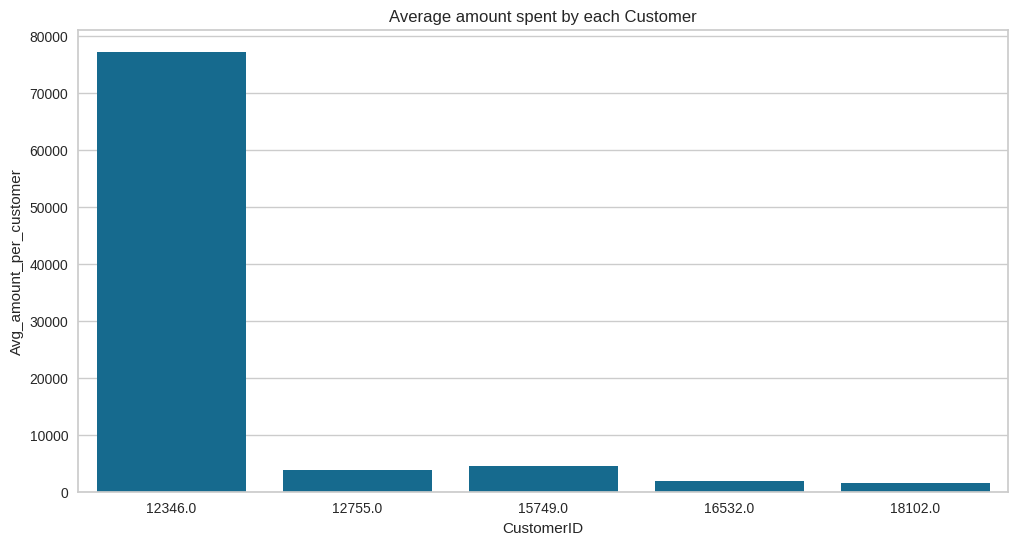

In [172]:
# Sales count on different days.
plt.figure(figsize=(12,6))
sns.barplot(x=avg_amount['CustomerID'].head(5),y=avg_amount['Avg_amount_per_customer'].head(15))
plt.title('Average amount spent by each Customer')

### **Observation**
* ***77183 (Dollars)is the highest average amount spent by the CustomerID-12346***
* ***56157 (Dollars) is the 2nd  highest average amount spent by the CustomerID-16446***

#     ---------------------------------------------------------------**Model Building**------------------------------------------------------

# **RFM Model Analysis:**

#**What is RFM?**

* ***RFM is a method used to analyze customer value. RFM stands for RECENCY, Frequency, and Monetary.***

* ***RECENCY: How recently did the customer visit our website or how recently did a customer purchase?***

* ***Frequency: How often do they visit or how often do they purchase?***

* ***Monetary: How much revenue we get from their visit or how much do they spend when they purchase?***

# **Why it is Needed?**
***RFM Analysis is a marketing framework that is used to understand and analyze customer behaviour based on the above three factors RECENCY, Frequency, and Monetary.***

***The RFM Analysis will help the businesses to segment their customer base into different homogenous groups so that they can engage with each group with different targeted marketing strategies.***

In [173]:
rfm_dataframe=retail_df.copy()

In [174]:
rfm_dataframe.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

          InvoiceDate  UnitPrice  CustomerID         Country  year  month_num  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010         12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010         12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   

   day_num  hour  minute     Month        Day  TotalAmount Day_time_type  
0        1     8      26  December  Wednesday        15.30       Morning  
1        1     8      26  December  Wednesday        20.34       Morning  
2        1     8      26  December  Wednesday        22.00       Morning  
3        1     8      26  December  Wednesday        20.34       Morning  
4        1     8      26  December  Wednesday        20.34       Morning

In [175]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_dataframe = retail_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_dataframe['InvoiceDate'] = rfm_dataframe['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_dataframe.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_dataframe.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0      367         31    711.79
2     12348.0      358         17    892.80
3     12356.0      325         36   2271.62
4     12359.0      331         16    547.50

In [176]:
# Descriptive Stats= Recency
rfm_dataframe.Recency.describe()

count    1110.000000
mean      351.116216
std        16.241250
min       325.000000
25%       334.000000
50%       358.000000
75%       366.000000
max       373.000000
Name: Recency, dtype: float64

Text(0.5, 1.0, 'Distribution of Recency')

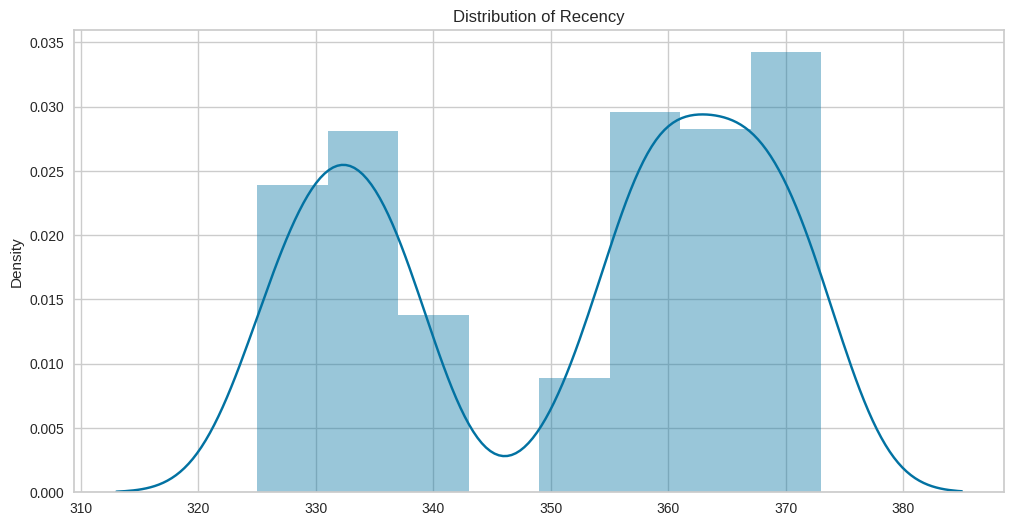

In [177]:
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_dataframe['Recency'])
plt.title('Distribution of Recency')

***Distribution of Recency is right skewed.***

In [178]:
# Descriptive Stats= Frequency
rfm_dataframe['Frequency'].describe()

count    1110.000000
mean       33.672072
std        44.787210
min         1.000000
25%        10.000000
50%        20.000000
75%        42.000000
max       693.000000
Name: Frequency, dtype: float64

Text(0.5, 1.0, 'Distribution of Frequency')

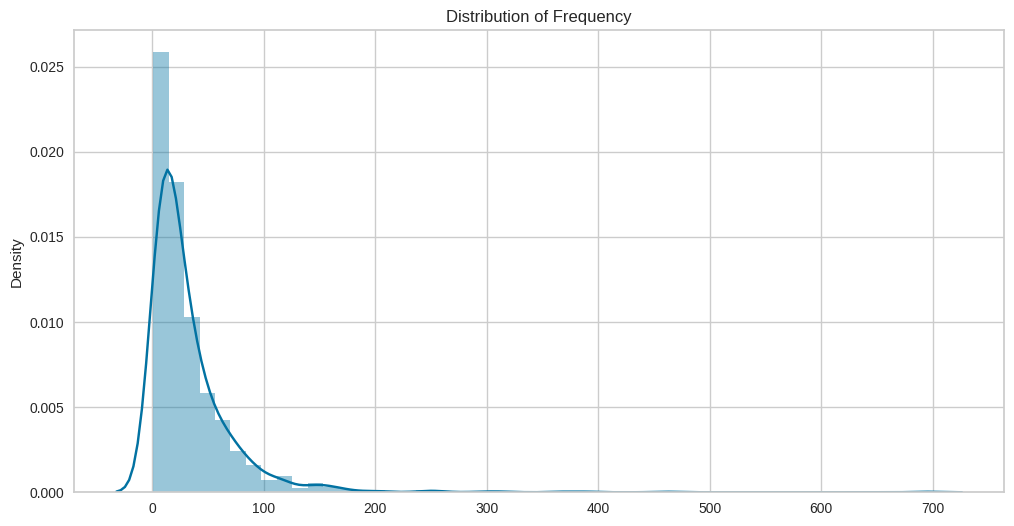

In [179]:
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_dataframe['Frequency'])
plt.title('Distribution of Frequency')

***Distribution of Frequency is highly right skewed.***

In [180]:
# Descriptive Stats= Monetary
rfm_dataframe['Monetary'].describe()

count     1110.000000
mean       850.867297
std       2970.304318
min          0.850000
25%        207.867500
50%        350.680000
75%        703.190000
max      77183.600000
Name: Monetary, dtype: float64

Text(0.5, 1.0, 'Distribution of Monetary')

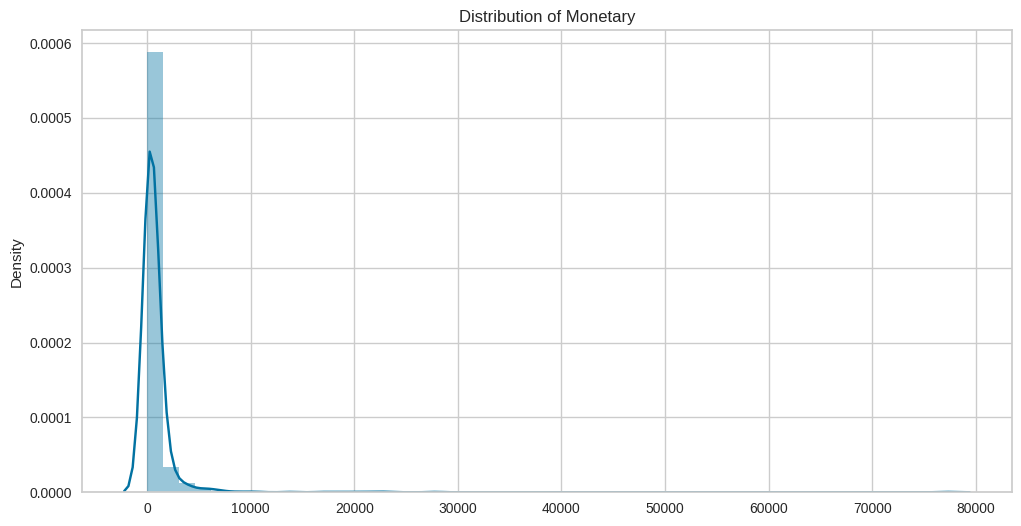

In [181]:
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_dataframe['Monetary'])
plt.title('Distribution of Monetary')

***Distribution of Monetary is highly right skewed.***

In [182]:
# Split the data into four segment using Quantile
quantile = rfm_dataframe.quantile(q = [0.25,0.50,0.75])


In [183]:
quantile = quantile.to_dict()

In [184]:
quantile

{'Recency': {0.25: 334.0, 0.5: 358.0, 0.75: 366.0},
 'Frequency': {0.25: 10.0, 0.5: 20.0, 0.75: 42.0},
 'Monetary': {0.25: 207.8675,
  0.5: 350.67999999999995,
  0.75: 703.1899999999998}}

In [185]:
 #Converting quantiles to a dictionary, easier to use.
#quantiles = quantiles.to_dict()
#Functions to create R, F and M segments
# arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
# lower the recency, good for the company



def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

        # arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
        # higher value of frequency and monetary lead to a good consumer. Here higher value = 1 in reverse way.

def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [186]:
# # this code was for understanding the above code function
# if 18 <= quantile['Recency'][0.25]:
#   print(1)
# else:
#   print('Great')

In [187]:
# Calculating and adding R,F and M segments values columns in the existing dataset to show R,F,M segment values
rfm_dataframe["R"] = rfm_dataframe['Recency'].apply(RScoring,args=('Recency',quantile,))
rfm_dataframe["F"] = rfm_dataframe['Frequency'].apply(FnMScoring,args=('Frequency',quantile,))
rfm_dataframe["M"] = rfm_dataframe['Monetary'].apply(FnMScoring,args=('Monetary',quantile,))
rfm_dataframe.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         325          1  77183.60  1  4  1
12347.0         367         31    711.79  4  2  1
12348.0         358         17    892.80  2  3  1
12356.0         325         36   2271.62  1  2  1
12359.0         331         16    547.50  1  3  2

In [188]:
# Add a new column to combine RFM score
rfm_dataframe['RFM_Group'] = rfm_dataframe.R.map(str)+rfm_dataframe.F.map(str)+rfm_dataframe.M.map(str)

In [189]:
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_dataframe['RFM_Score'] = rfm_dataframe[['R', 'F', 'M']].sum(axis = 1)
rfm_dataframe.head()

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score
CustomerID                                                            
12346.0         325          1  77183.60  1  4  1       141          6
12347.0         367         31    711.79  4  2  1       421          7
12348.0         358         17    892.80  2  3  1       231          6
12356.0         325         36   2271.62  1  2  1       121          4
12359.0         331         16    547.50  1  3  2       132          6

In [190]:
rfm_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1110 entries, 12346.0 to 18283.0
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    1110 non-null   int64  
 1   Frequency  1110 non-null   int64  
 2   Monetary   1110 non-null   float64
 3   R          1110 non-null   int64  
 4   F          1110 non-null   int64  
 5   M          1110 non-null   int64  
 6   RFM_Group  1110 non-null   object 
 7   RFM_Score  1110 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 78.0+ KB


In [191]:
rfm_dataframe['RFM_Score'].unique()

array([ 6,  7,  4,  3,  8,  5, 11, 10,  9, 12])

In [192]:
# Assign Loyelty Level to each customer
Loyalty_Level = ['Platinaum','Gold','Silver','Bronz']

Score_cut = pd.qcut(rfm_dataframe['RFM_Score'],q = 4,labels=Loyalty_Level)
rfm_dataframe['RFM_Loyalty_Level'] = Score_cut.values
rfm_dataframe.reset_index().head()

CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
0     12346.0      325          1  77183.60  1  4  1       141          6   
1     12347.0      367         31    711.79  4  2  1       421          7   
2     12348.0      358         17    892.80  2  3  1       231          6   
3     12356.0      325         36   2271.62  1  2  1       121          4   
4     12359.0      331         16    547.50  1  3  2       132          6   

  RFM_Loyalty_Level  
0              Gold  
1              Gold  
2              Gold  
3         Platinaum  
4              Gold

In [193]:
rfm_dataframe['RFM_Score'].unique()

array([ 6,  7,  4,  3,  8,  5, 11, 10,  9, 12])

In [194]:
# Validate the data For RFM group = 111
rfm_dataframe[rfm_dataframe['RFM_Group'] == '111'].sort_values("Monetary",ascending = False).reset_index().head(10)

CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
0     15061.0      325        162  22107.61  1  1  1       111          3   
1     17450.0      332         74  20649.04  1  1  1       111          3   
2     14646.0      329        149  18980.94  1  1  1       111          3   
3     14156.0      329         44  17096.92  1  1  1       111          3   
4     13089.0      326        257   9650.39  1  1  1       111          3   
5     14911.0      325        314   8461.52  1  1  1       111          3   
6     12415.0      333         47   7092.98  1  1  1       111          3   
7     13798.0      332         60   6571.02  1  1  1       111          3   
8     13093.0      330        110   6068.47  1  1  1       111          3   
9     14733.0      332        114   5935.53  1  1  1       111          3   

  RFM_Loyalty_Level  
0         Platinaum  
1         Platinaum  
2         Platinaum  
3         Platinaum  
4         Platinaum  
5         Platinaum  
6         Platinaum  
7         Platinaum  
8         Platinaum  
9         Platinaum

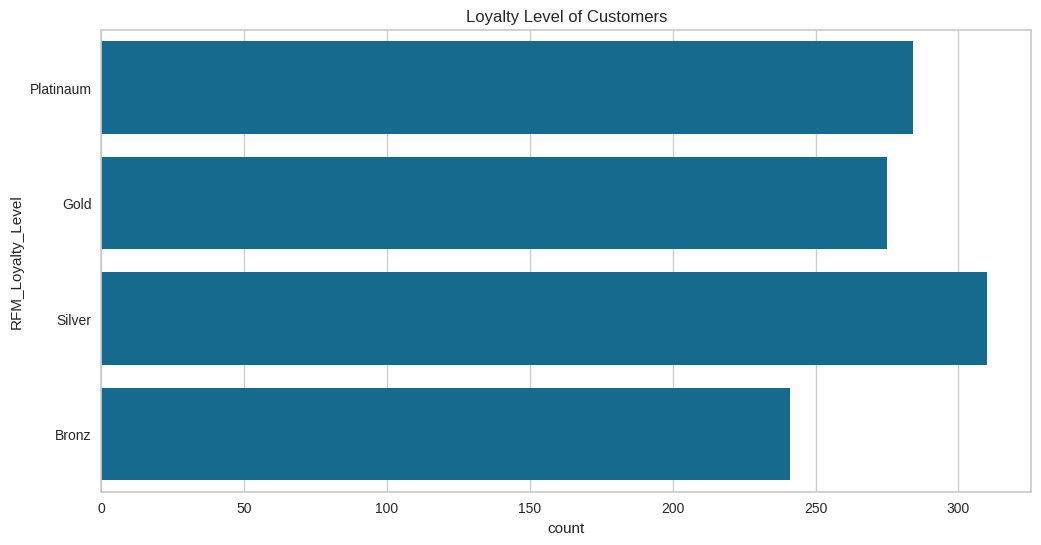

In [195]:
# Plot the loyelty level
plt.figure(figsize=(12,6))
sns.countplot(rfm_dataframe['RFM_Loyalty_Level'])
plt.title('Loyalty Level of Customers')
plt.show()

In [196]:
#Folowing table contains our target peoples
rfm_dataframe[rfm_dataframe['RFM_Loyalty_Level'] == 'Platinaum'].sort_values("Monetary",ascending = False).reset_index().head(10)

CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
0     15061.0      325        162  22107.61  1  1  1       111          3   
1     17450.0      332         74  20649.04  1  1  1       111          3   
2     14646.0      329        149  18980.94  1  1  1       111          3   
3     14156.0      329         44  17096.92  1  1  1       111          3   
4     16029.0      330         35  13862.52  1  2  1       121          4   
5     17511.0      338        122  10573.22  2  1  1       211          4   
6     13089.0      326        257   9650.39  1  1  1       111          3   
7     14911.0      325        314   8461.52  1  1  1       111          3   
8     13777.0      329         42   7294.42  1  2  1       121          4   
9     12415.0      333         47   7092.98  1  1  1       111          3   

  RFM_Loyalty_Level  
0         Platinaum  
1         Platinaum  
2         Platinaum  
3         Platinaum  
4         Platinaum  
5         Platinaum  
6         Platinaum  
7         Platinaum  
8         Platinaum  
9         Platinaum

In [197]:
segmentation_based_on_RFM=rfm_dataframe[['Recency','Frequency','Monetary','RFM_Loyalty_Level']]

In [198]:
segmentation_based_on_RFM.groupby('RFM_Loyalty_Level').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

Recency            Frequency              Monetary  \
                         mean  min  max       mean min  max         mean   
RFM_Loyalty_Level                                                          
Platinaum          337.228873  325  366  71.693662  11  693  1788.957852   
Gold               349.061818  325  373  33.083636   1  297  1083.597927   
Silver             354.677419  325  373  18.748387   1  105   313.079645   
Bronz              365.244813  336  373   8.734440   1   38   171.595643   

                                           
                      min       max count  
RFM_Loyalty_Level                          
Platinaum          220.85  22107.61   284  
Gold               108.45  77183.60   275  
Silver               0.85   3794.40   310  
Bronz               12.45    417.62   241

In [199]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns
rfm_dataframe['Recency'] = [handle_neg_n_zero(x) for x in rfm_dataframe.Recency]
rfm_dataframe['Monetary'] = [handle_neg_n_zero(x) for x in rfm_dataframe.Monetary]

In [200]:
#Perform Log transformation to bring data into normal or near normal distribution
Log_rfm_df = rfm_dataframe[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

***Now let's Visualize the Distribution of Recency,Frequency and Monetary.***

Text(0.5, 1.0, 'Distribution of Recency')

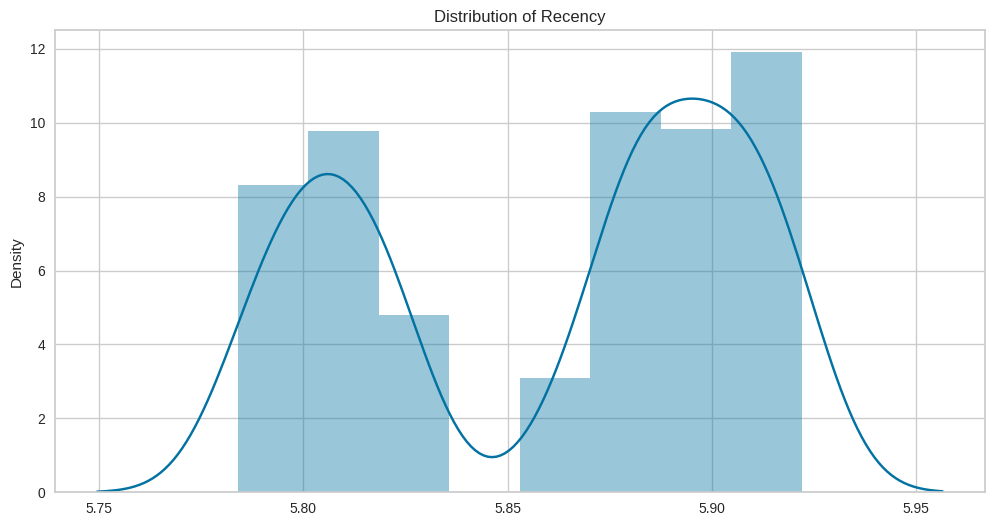

In [201]:
plt.figure(figsize=(12,6))
sns.distplot(x=Log_rfm_df['Recency'])
plt.title('Distribution of Recency')

Text(0.5, 1.0, 'Distribution of Frequency')

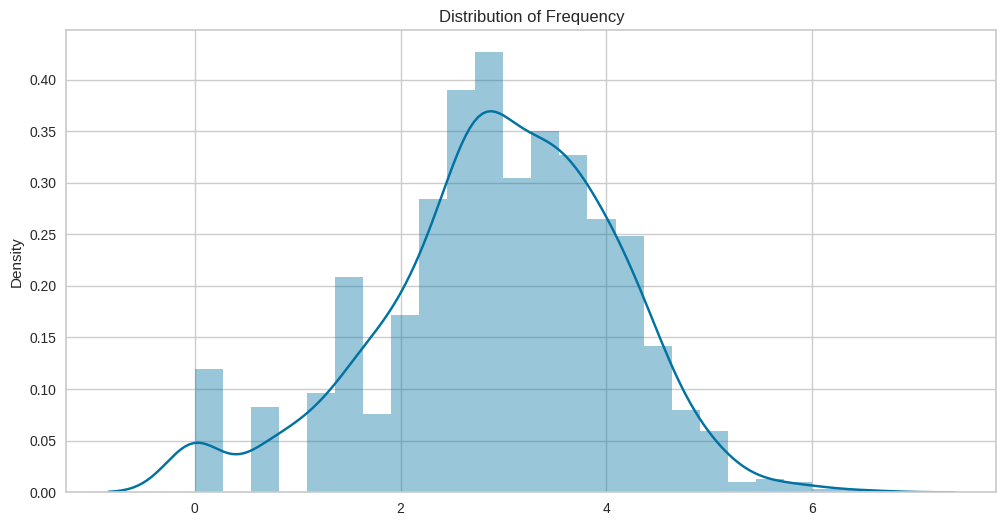

In [202]:
plt.figure(figsize=(12,6))
sns.distplot(x=Log_rfm_df['Frequency'])
plt.title('Distribution of Frequency')

Text(0.5, 1.0, 'Distribution of Monetary')

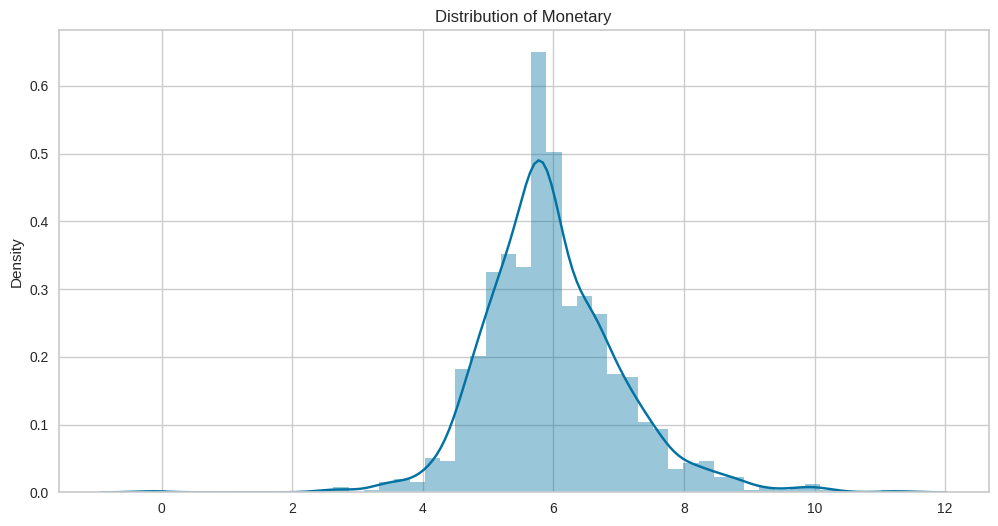

In [203]:
plt.figure(figsize=(12,6))
sns.distplot(x=Log_rfm_df['Monetary'])
plt.title('Distribution of Monetary')

In [204]:

rfm_dataframe['Recency_log'] = rfm_dataframe['Recency'].apply(math.log)
rfm_dataframe['Frequency_log'] = rfm_dataframe['Frequency'].apply(math.log)
rfm_dataframe['Monetary_log'] = rfm_dataframe['Monetary'].apply(math.log)

In [205]:
rfm_dataframe

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  1  4  1       141          6   
12347.0         367         31    711.79  4  2  1       421          7   
12348.0         358         17    892.80  2  3  1       231          6   
12356.0         325         36   2271.62  1  2  1       121          4   
12359.0         331         16    547.50  1  3  2       132          6   
...             ...        ...       ... .. .. ..       ...        ...   
18245.0         355         27    365.73  2  2  2       222          6   
18259.0         366          7    376.30  3  4  2       342          9   
18260.0         334         37    787.77  1  2  1       121          4   
18269.0         366          7    168.60  3  4  4       344         11   
18283.0         337         57    108.45  2  1  4       214          7   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  
CustomerID                                                              
12346.0                 Gold     5.783825       0.000000     11.253942  
12347.0                 Gold     5.905362       3.433987      6.567783  
12348.0                 Gold     5.880533       2.833213      6.794363  
12356.0            Platinaum     5.783825       3.583519      7.728249  
12359.0                 Gold     5.802118       2.772589      6.305362  
...                      ...          ...            ...           ...  
18245.0                 Gold     5.872118       3.295837      5.901895  
18259.0               Silver     5.902633       1.945910      5.930387  
18260.0            Platinaum     5.811141       3.610918      6.669206  
18269.0                Bronz     5.902633       1.945910      5.127529  
18283.0                 Gold     5.820083       4.043051      4.686289  

[1110 rows x 12 columns]

# **1) KMeans Clustering:**

In [206]:
#Importing Libraries

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [207]:
!pip install yellowbrick

Before implementing the Kmeans Clustering alogorthm we need to decide the number of clusters to put inside algorithm as input. So we will be finding the minmum number of clusters required by using Elbow method.

#---------------------------------***Recency and Monetary.***--------------------------

##***A)  Applying Elbow Method on Recency and Monetary.***

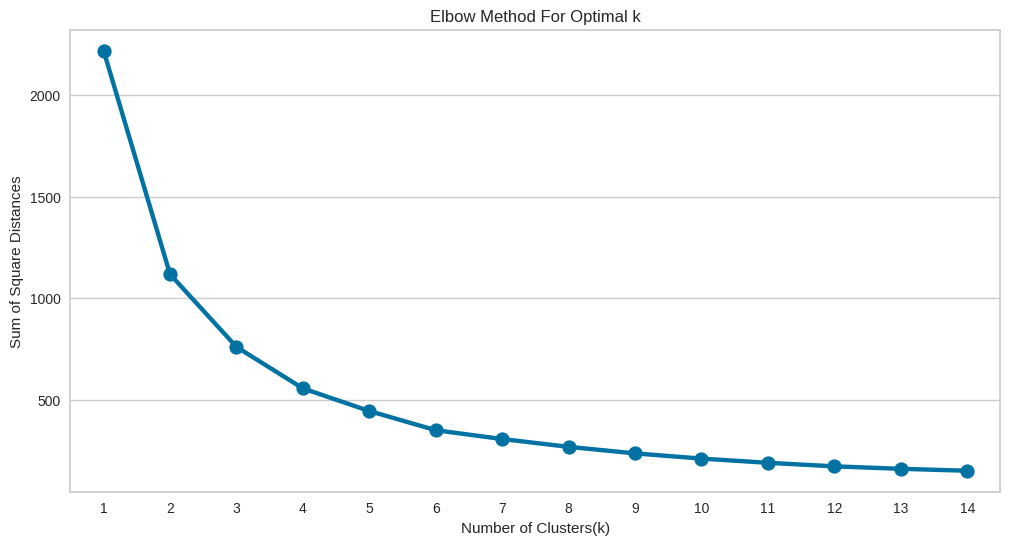

In [208]:
# taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

##**Here we can see that Optimal value for cluster came out to be 2.**

### ***Cross verifying with ElbowVisualizar***
The elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

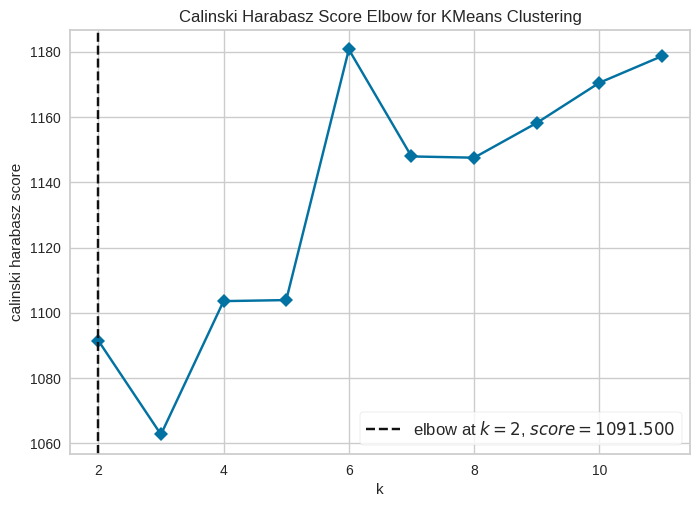

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [209]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Elbow Visulaizer also giving cluster=2

##**Silhouette Score** ***(Validating Above optimal cluster value(i.e optimal_cluster=2)***

In [210]:
# taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5110349532831753
For n_clusters = 3, silhouette score is 0.49877292364731557
For n_clusters = 4, silhouette score is 0.4113725385148908
For n_clusters = 5, silhouette score is 0.4107297142100782
For n_clusters = 6, silhouette score is 0.42136190247809513
For n_clusters = 7, silhouette score is 0.3999952014360514
For n_clusters = 8, silhouette score is 0.39563377630814084
For n_clusters = 9, silhouette score is 0.39156874810361836
For n_clusters = 10, silhouette score is 0.3938297769696648
For n_clusters = 11, silhouette score is 0.3879514700389853
For n_clusters = 12, silhouette score is 0.39095038348083644
For n_clusters = 13, silhouette score is 0.38790371950582875
For n_clusters = 14, silhouette score is 0.38302610481377225
For n_clusters = 15, silhouette score is 0.3712162861043952


***Here we can see the for n_cluster=2 silhouette score is good as compared to others.(if values is close to 1 means data points are clustered very well to respective clusters and distance of that datapoint is very far from the other cluster.)***

For n_clusters = 2 The average silhouette_score is : 0.5110349532831753
For n_clusters = 3 The average silhouette_score is : 0.49877292364731557
For n_clusters = 4 The average silhouette_score is : 0.4113725385148908
For n_clusters = 5 The average silhouette_score is : 0.4107297142100782
For n_clusters = 6 The average silhouette_score is : 0.42136190247809513
For n_clusters = 7 The average silhouette_score is : 0.3999952014360514
For n_clusters = 8 The average silhouette_score is : 0.39563377630814084
For n_clusters = 9 The average silhouette_score is : 0.39156874810361836
For n_clusters = 10 The average silhouette_score is : 0.3938297769696648


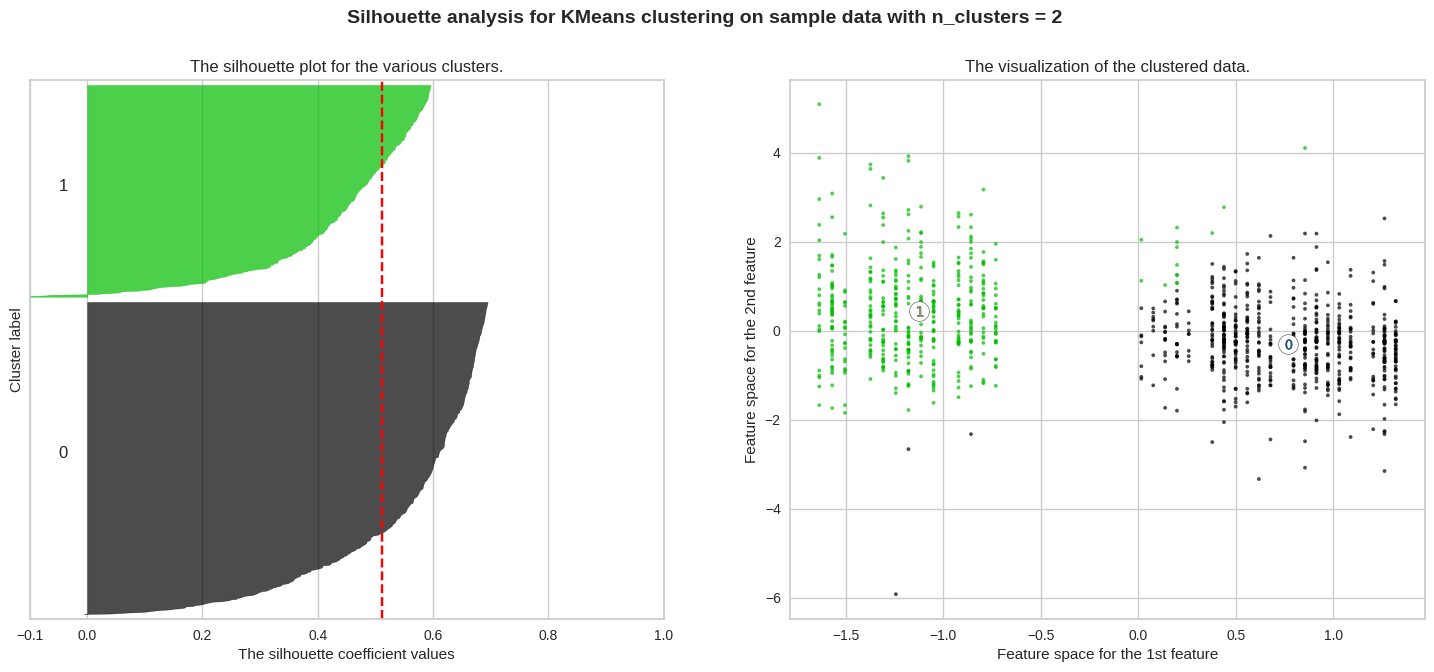

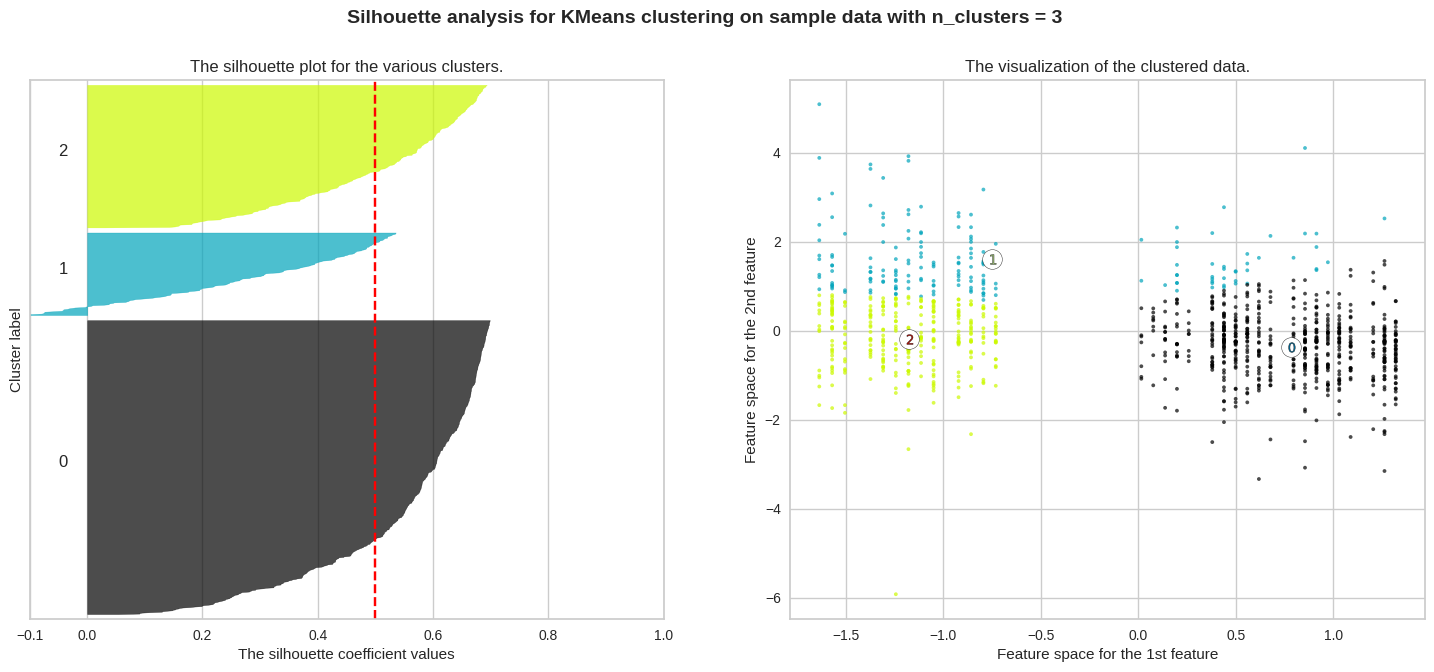

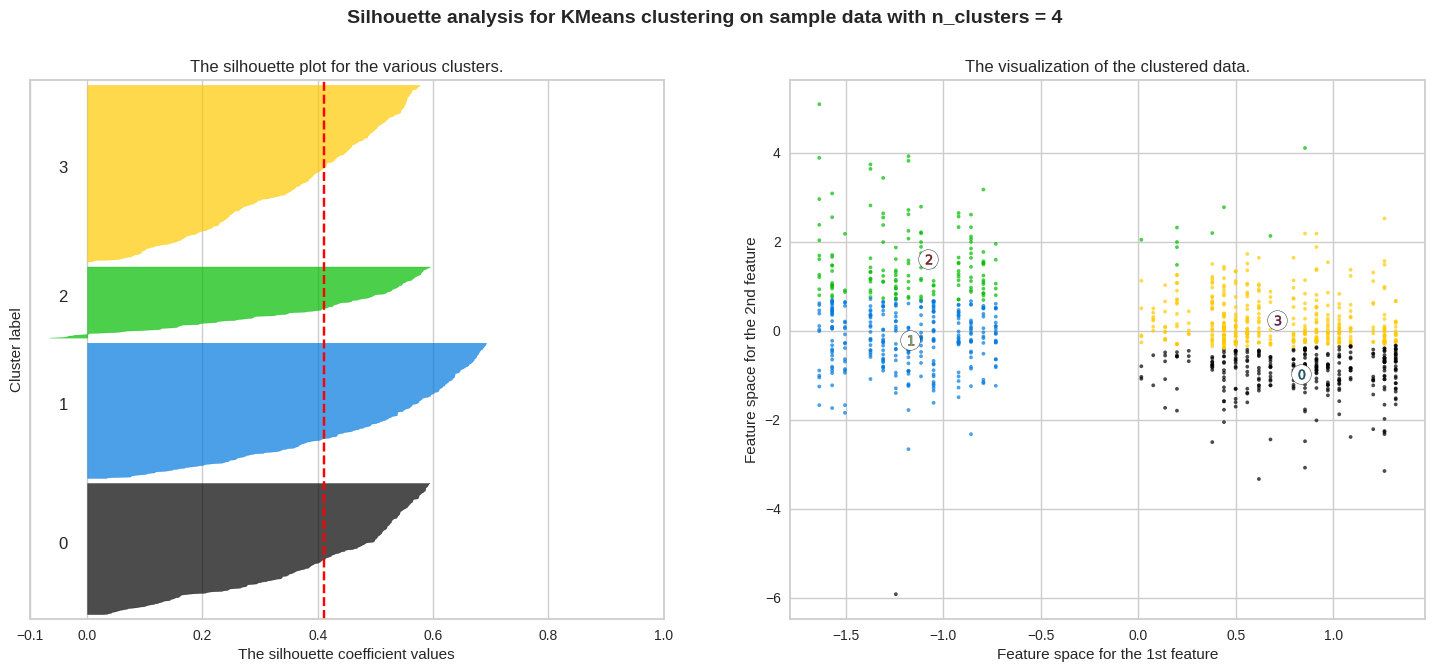

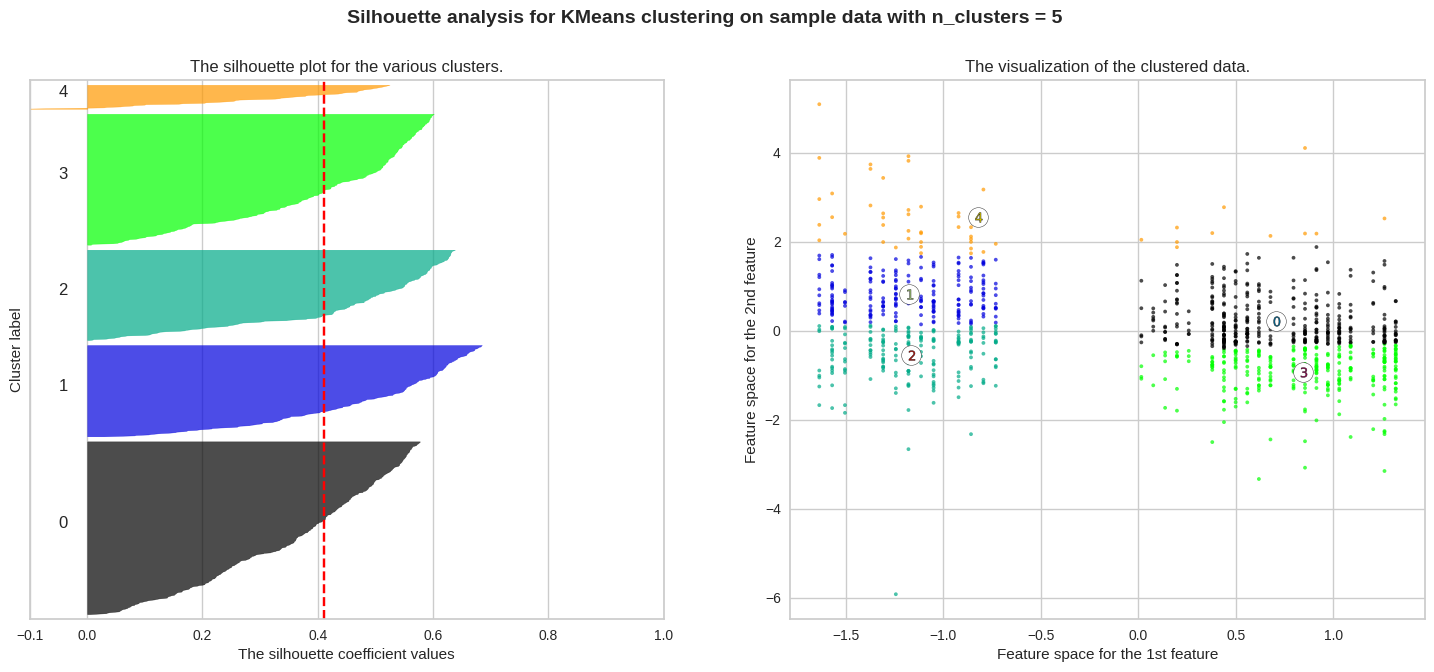

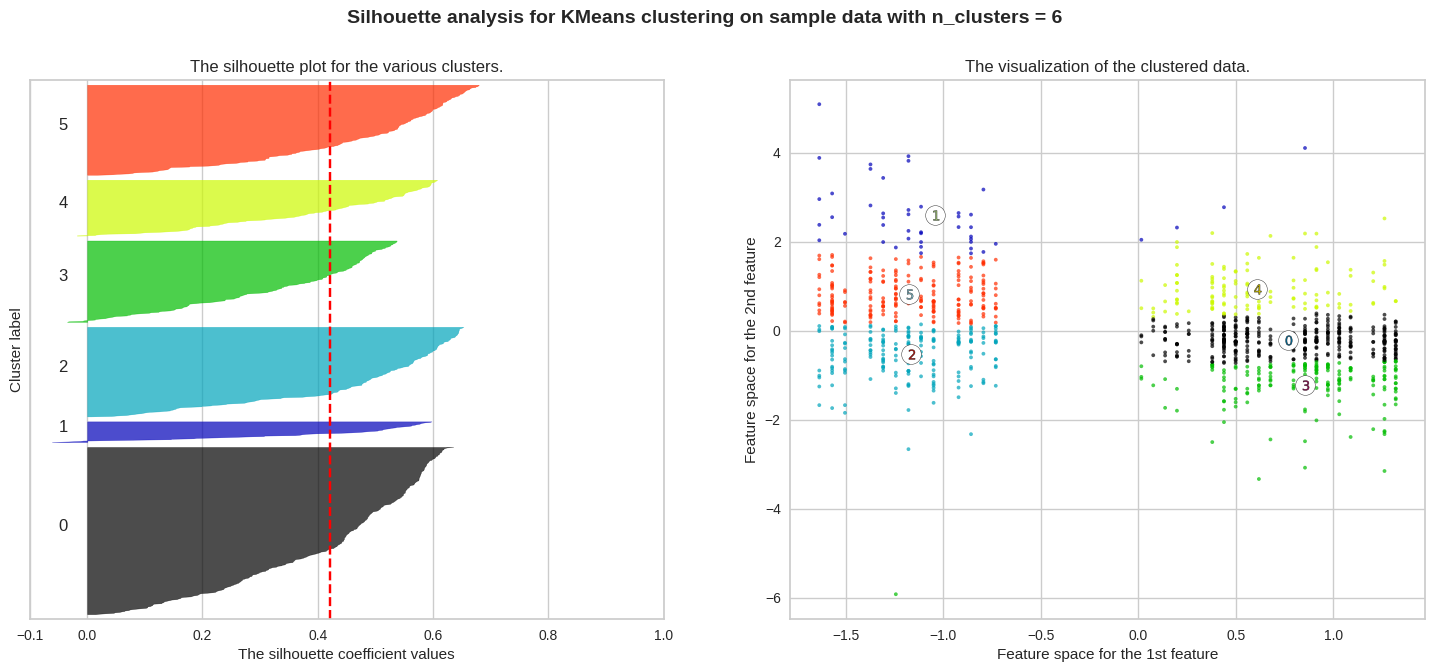

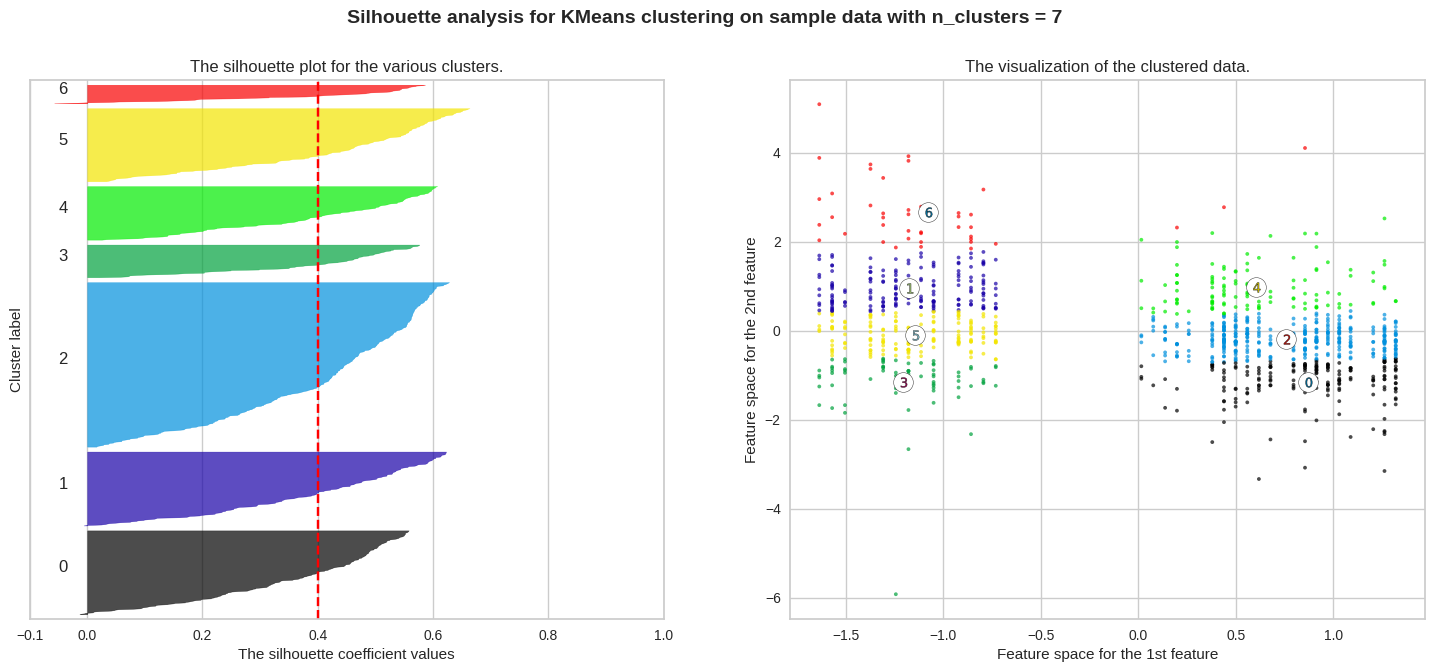

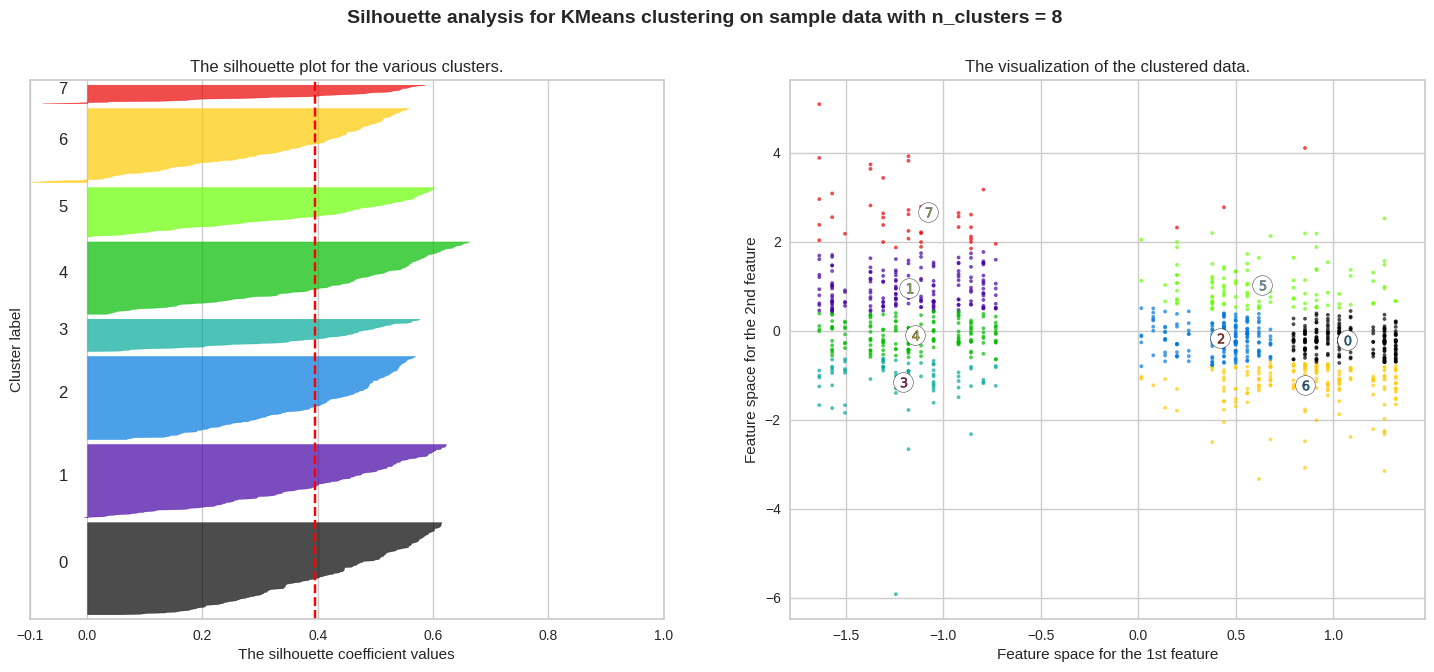

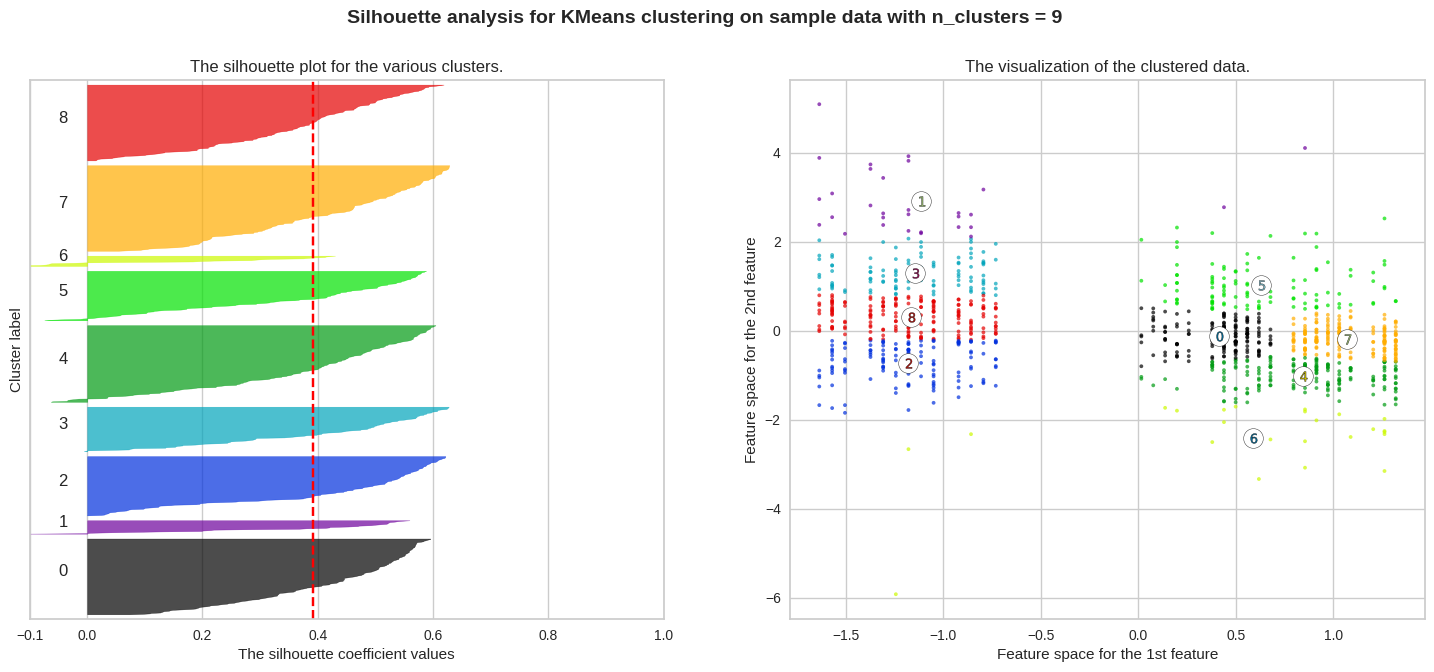

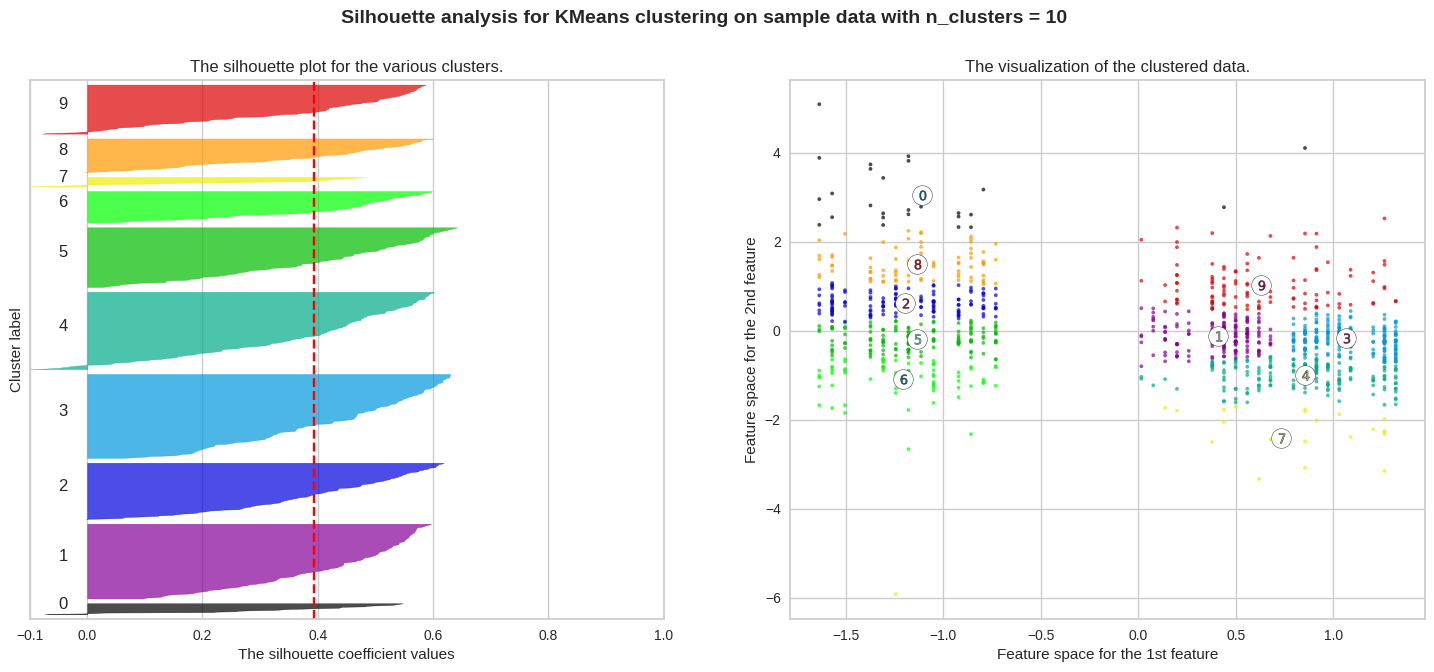

In [211]:

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


### **Observations**

* ***We got good Silhouette plot for Cluster-2 but still few datapoints are on the negative side of the Silhouette Coefficient value as shown in below figure. but its better than others***
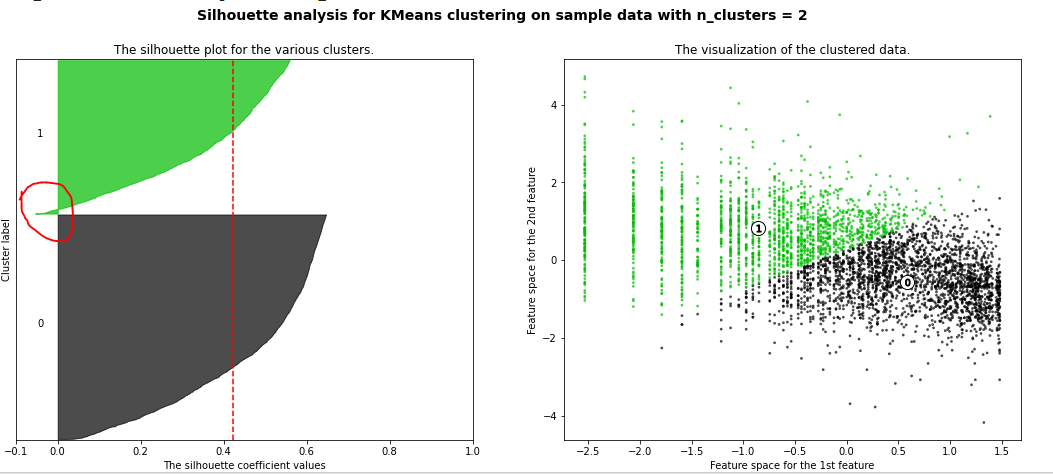

###**So giving n_clusters=2 on Kmeans Model.**

In [212]:
# applying Kmeans_clustering algorithm
kmeans_rec_mon = KMeans(n_clusters=2)
kmeans_rec_mon.fit(X)
y_kmeans= kmeans_rec_mon.predict(X)

In [213]:
#Find the clusters for the observation given in the dataset
rfm_dataframe['Cluster_based_rec_mon'] = kmeans_rec_mon.labels_
rfm_dataframe.head(10)

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  1  4  1       141          6   
12347.0         367         31    711.79  4  2  1       421          7   
12348.0         358         17    892.80  2  3  1       231          6   
12356.0         325         36   2271.62  1  2  1       121          4   
12359.0         331         16    547.50  1  3  2       132          6   
12370.0         357         91   1868.02  2  1  1       211          4   
12377.0         354         43   1001.52  2  1  1       211          4   
12383.0         331         68   1251.88  1  1  1       111          3   
12386.0         337         10    401.90  2  4  2       242          8   
12388.0         326         19    431.30  1  3  2       132          6   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  \
CustomerID                                                               
12346.0                 Gold     5.783825       0.000000     11.253942   
12347.0                 Gold     5.905362       3.433987      6.567783   
12348.0                 Gold     5.880533       2.833213      6.794363   
12356.0            Platinaum     5.783825       3.583519      7.728249   
12359.0                 Gold     5.802118       2.772589      6.305362   
12370.0            Platinaum     5.877736       4.510860      7.532634   
12377.0            Platinaum     5.869297       3.761200      6.909274   
12383.0            Platinaum     5.802118       4.219508      7.132402   
12386.0               Silver     5.820083       2.302585      5.996203   
12388.0                 Gold     5.786897       2.944439      6.066804   

            Cluster_based_rec_mon  
CustomerID                         
12346.0                         1  
12347.0                         0  
12348.0                         0  
12356.0                         1  
12359.0                         1  
12370.0                         0  
12377.0                         0  
12383.0                         1  
12386.0                         1  
12388.0                         1

In [214]:
# Centers of the clusters(coordinates)
centers = kmeans_rec_mon.cluster_centers_
centers

array([[ 0.76632747, -0.29905428],
       [-1.12394695,  0.43861294]])

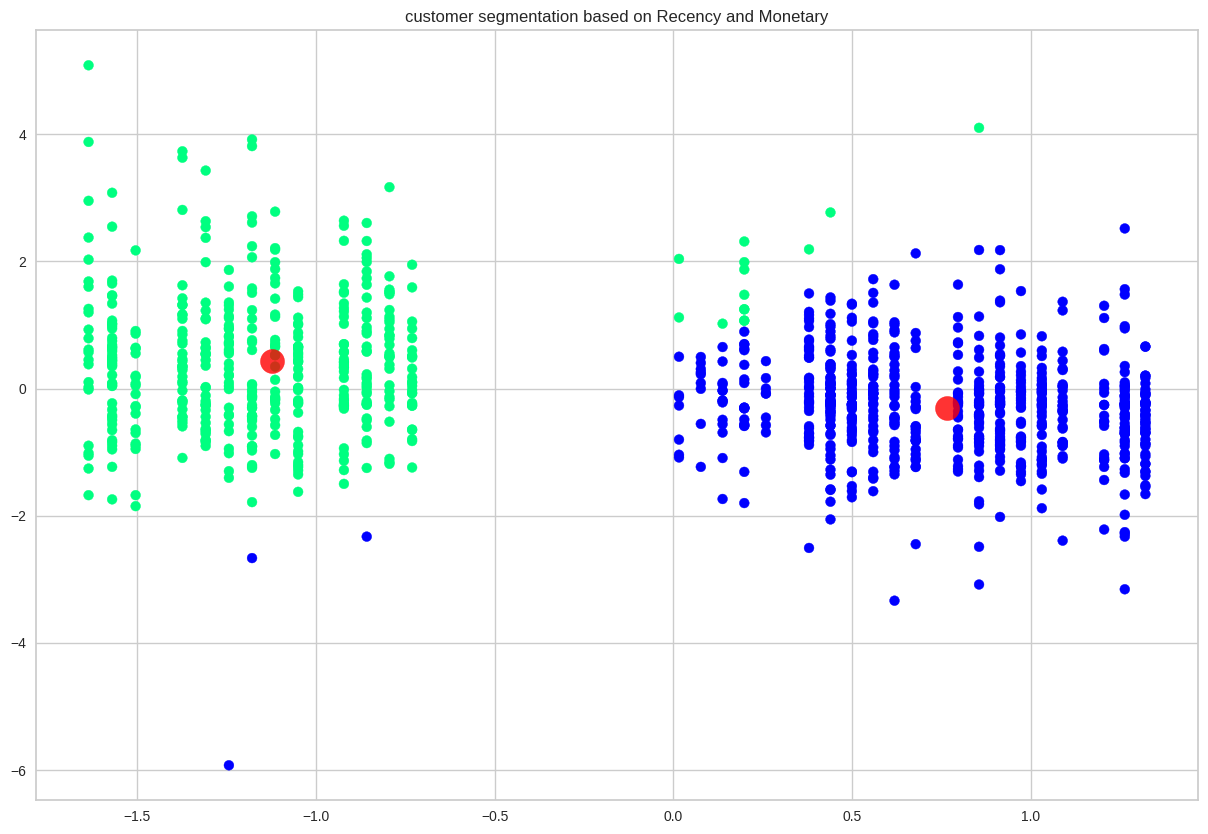

In [215]:
# ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans_rec_mon.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8)

#   **2) DBSCAN Algorithm on Recency and Monetary**

In [216]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [217]:
#eps value is the radius value for the datapoint from which circle is drawn and min sample indicates how many datapoints should be consider to consider that point in cluster.
#codesource(sklearn documentation)
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 70
Silhouette Coefficient: 0.502


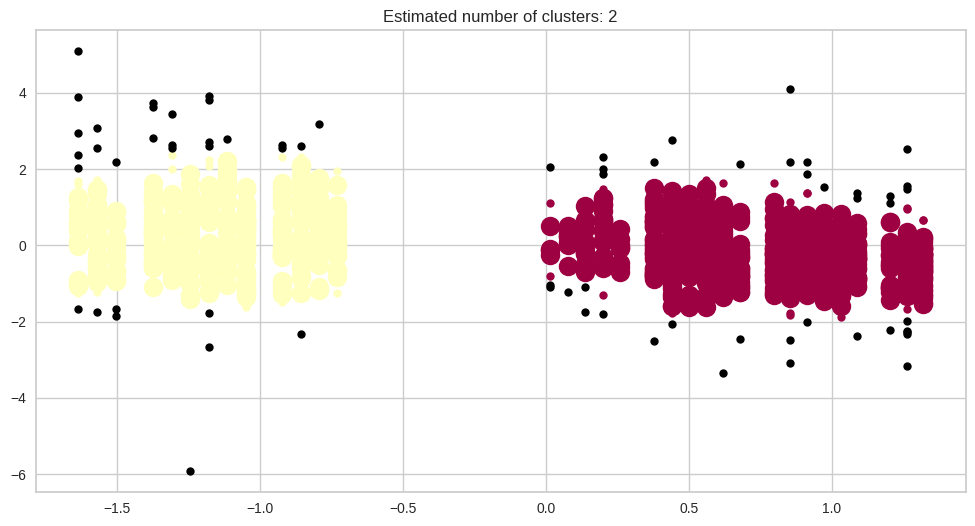

In [218]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(12,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k


    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)

plt.show()

#----------------------------------------***Frequency and Monetary***-------------------------------

# **1) KMeans Clustering**

Before implementing the Kmeans Clustering alogorthm we need to decide the number of clusters to put inside algorithm as input. So we will be finding the minmum number of clusters required by using Elbow method.

##***A)  Applying Elbow Method on Frequency and Monetary.***

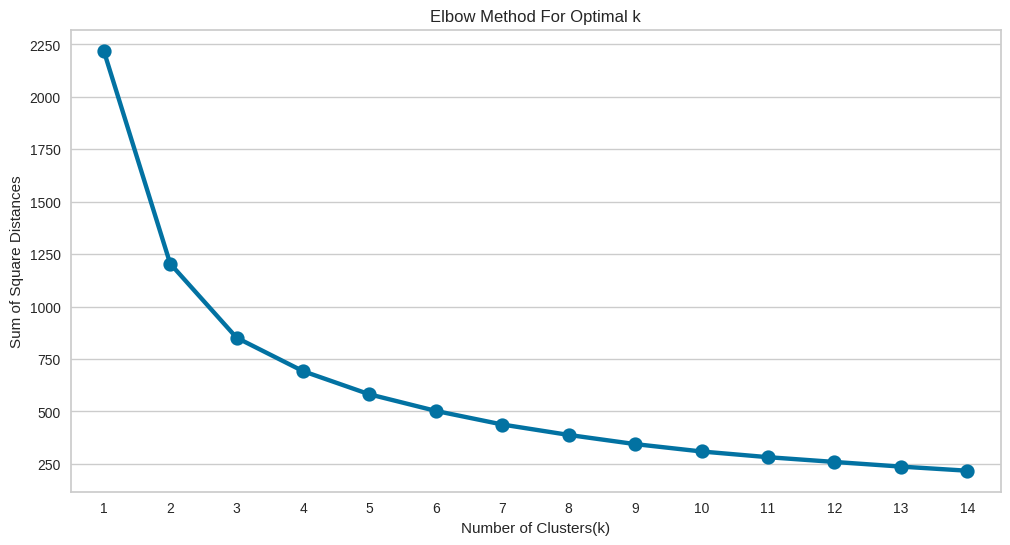

In [219]:
# taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['Frequency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

##**Here we can see that Optimal value for cluster came out to be 2.**

### ***Cross verifying with ElbowVisualizar***

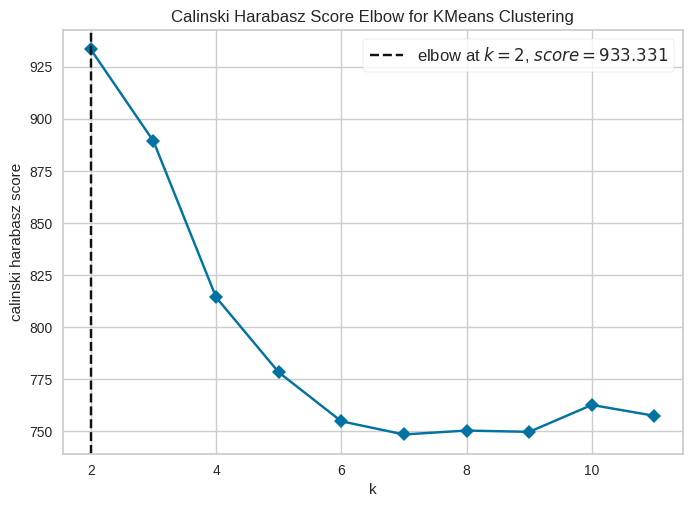

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [220]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Elbow Visulaizer also giving cluster=2

##**Silhouette Score** ***(Validating Above optimal cluster value(i.e optimal_cluster=2)***

In [221]:
# taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['Frequency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.405522790078118
For n_clusters = 3, silhouette score is 0.3673768661345707
For n_clusters = 4, silhouette score is 0.34589317153869625
For n_clusters = 5, silhouette score is 0.3570457994046127
For n_clusters = 6, silhouette score is 0.3398435953099632
For n_clusters = 7, silhouette score is 0.3501330441443873
For n_clusters = 8, silhouette score is 0.35194260451542897
For n_clusters = 9, silhouette score is 0.35845402464125287
For n_clusters = 10, silhouette score is 0.36356456392537223
For n_clusters = 11, silhouette score is 0.37224712179626823
For n_clusters = 12, silhouette score is 0.3642559708039152
For n_clusters = 13, silhouette score is 0.370588510357655
For n_clusters = 14, silhouette score is 0.37958216838139486
For n_clusters = 15, silhouette score is 0.38474823226583177


***Here we can see the for n_cluster=2 silhouette score is good as compared to others.(if values is close to 1 means data points are clustered very well to respective clusters and distance of that datapoint is very far from the other cluster.)***

For n_clusters = 2 The average silhouette_score is : 0.405522790078118
For n_clusters = 3 The average silhouette_score is : 0.3673768661345707
For n_clusters = 4 The average silhouette_score is : 0.34589317153869625
For n_clusters = 5 The average silhouette_score is : 0.3570457994046127
For n_clusters = 6 The average silhouette_score is : 0.3398435953099632
For n_clusters = 7 The average silhouette_score is : 0.3501330441443873
For n_clusters = 8 The average silhouette_score is : 0.35194260451542897
For n_clusters = 9 The average silhouette_score is : 0.35845402464125287
For n_clusters = 10 The average silhouette_score is : 0.36356456392537223


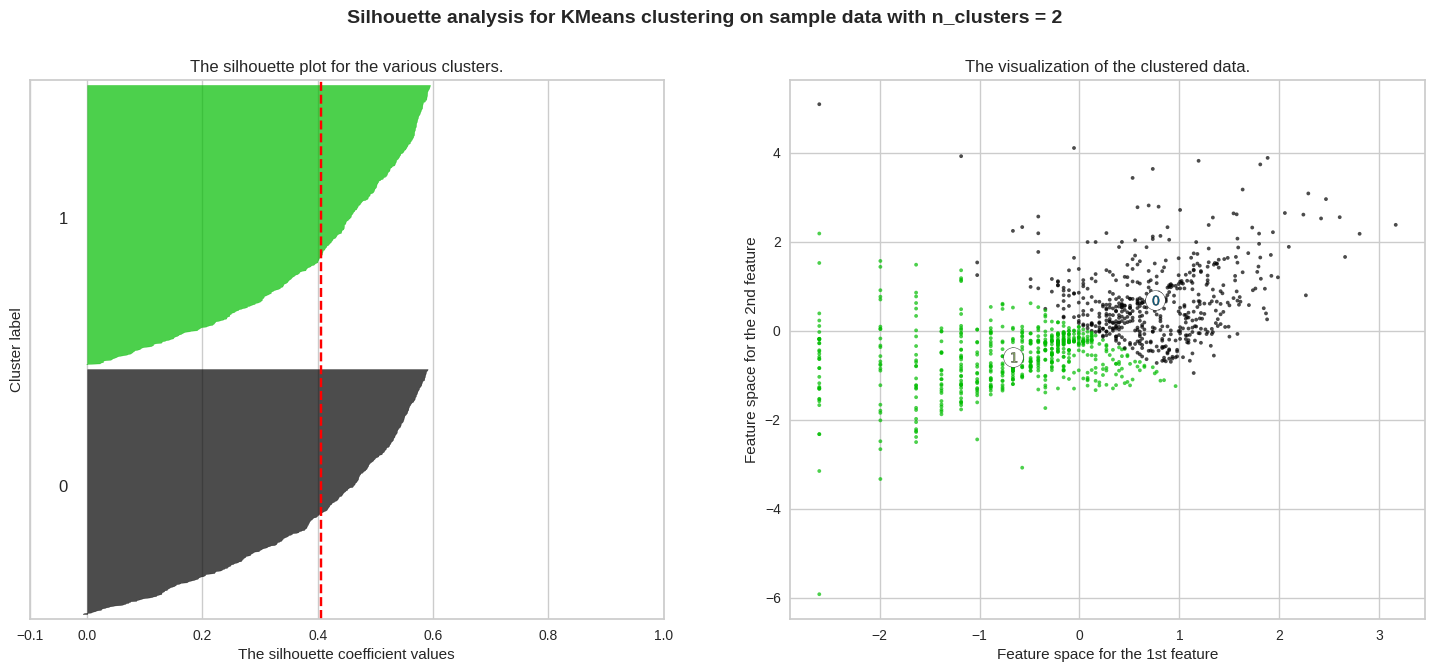

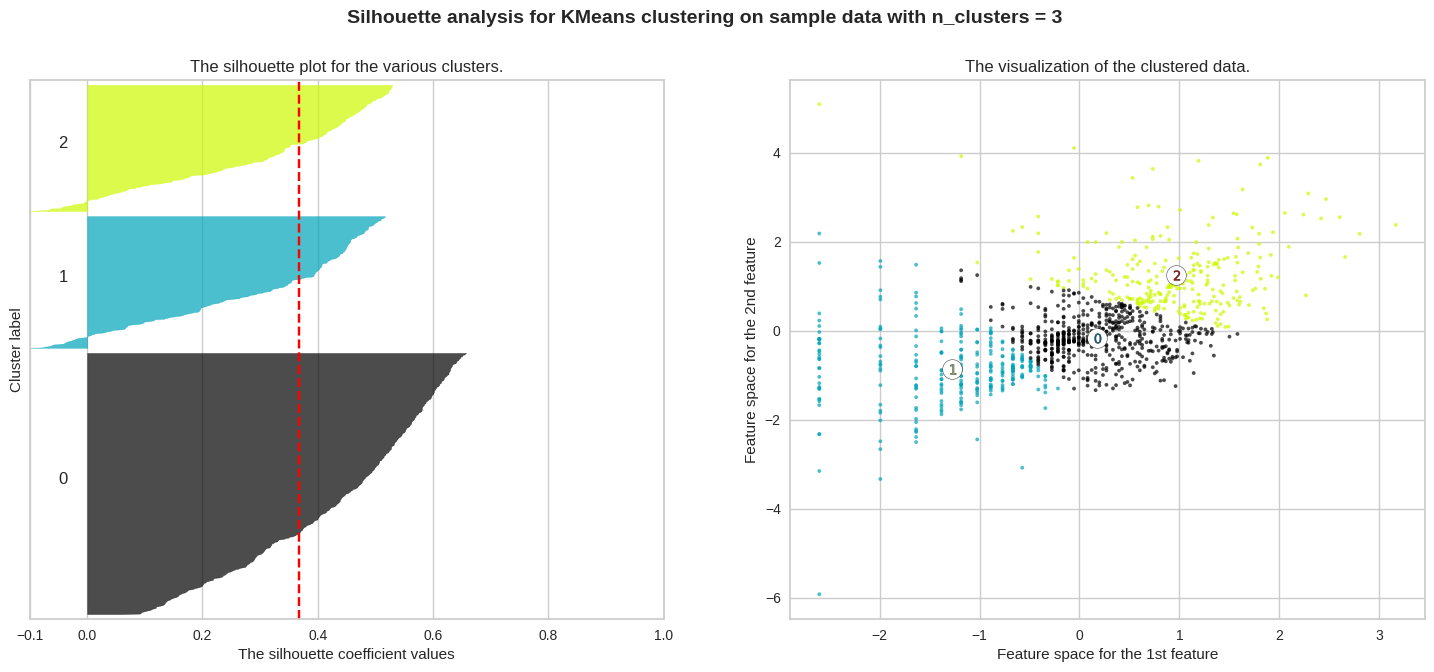

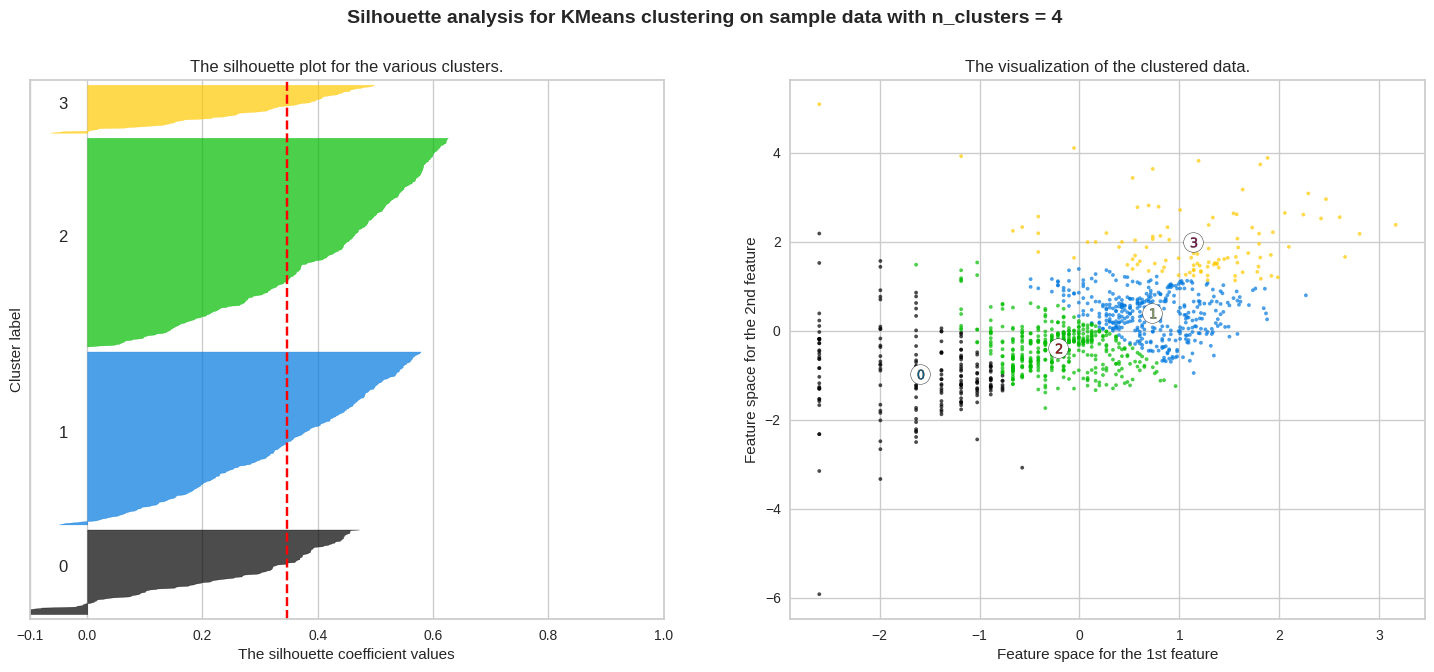

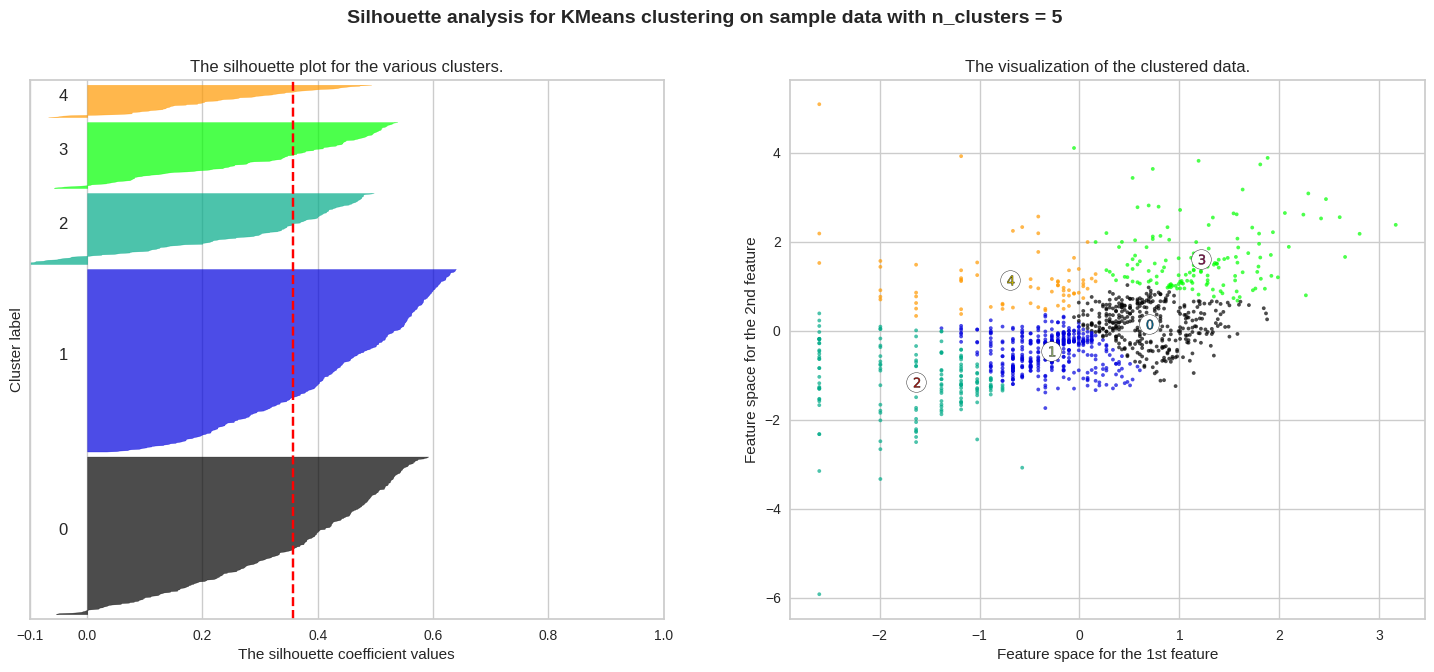

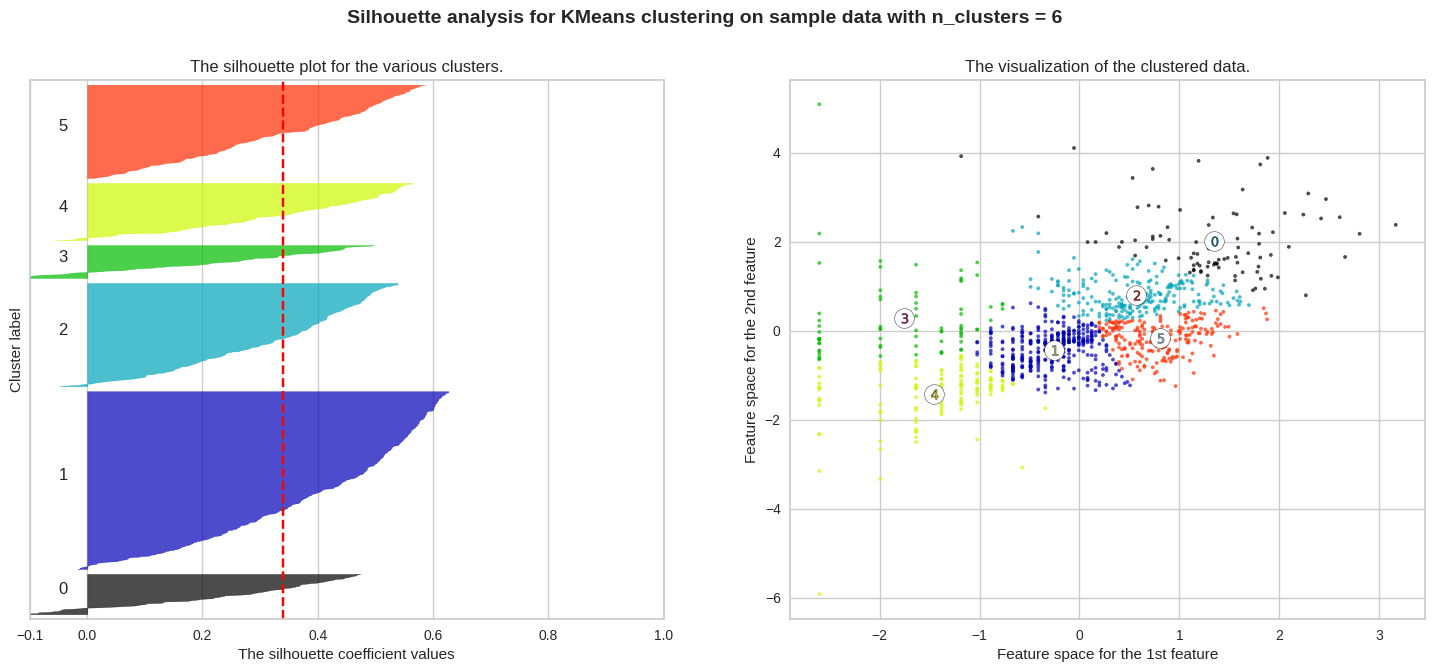

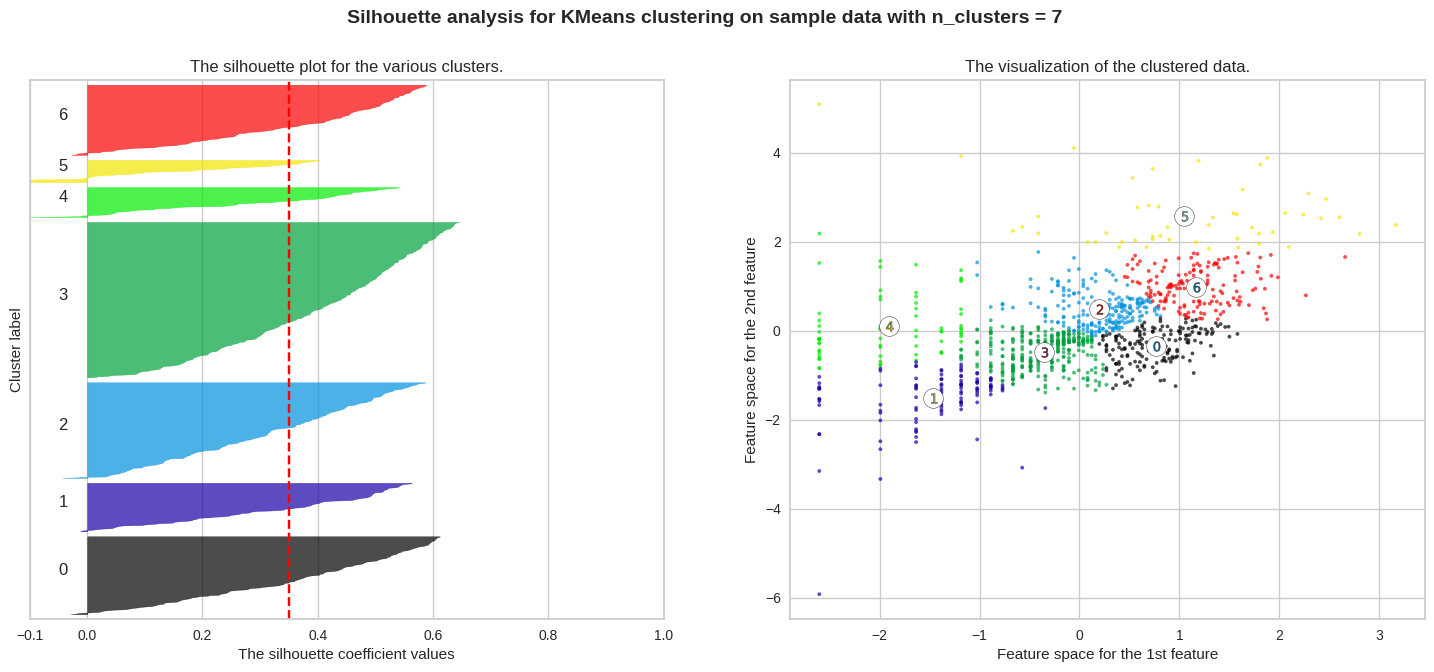

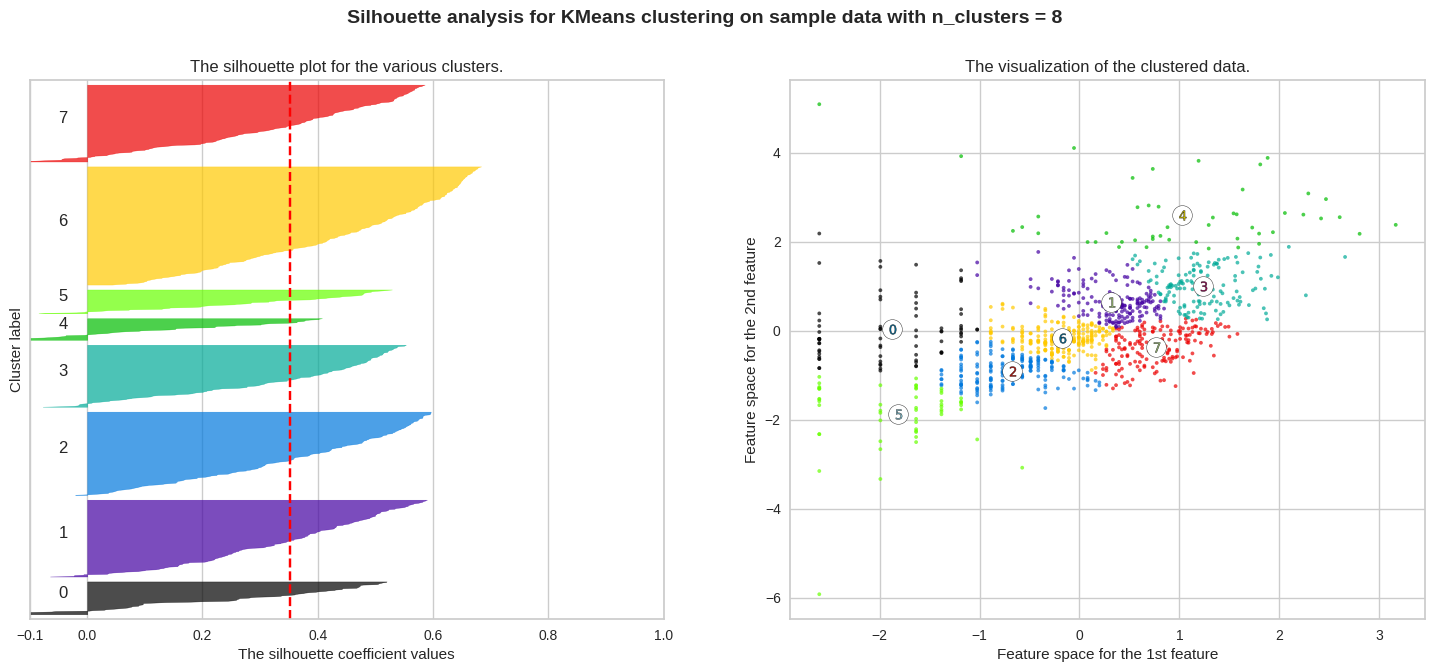

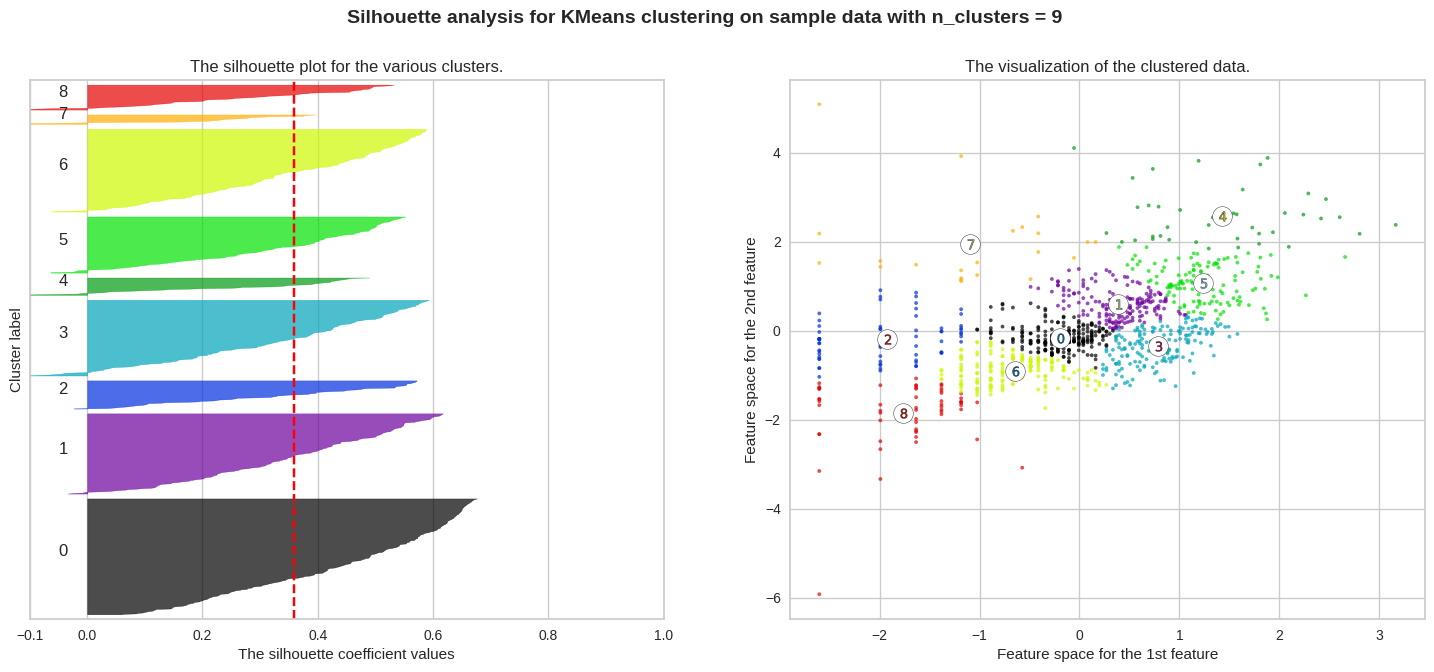

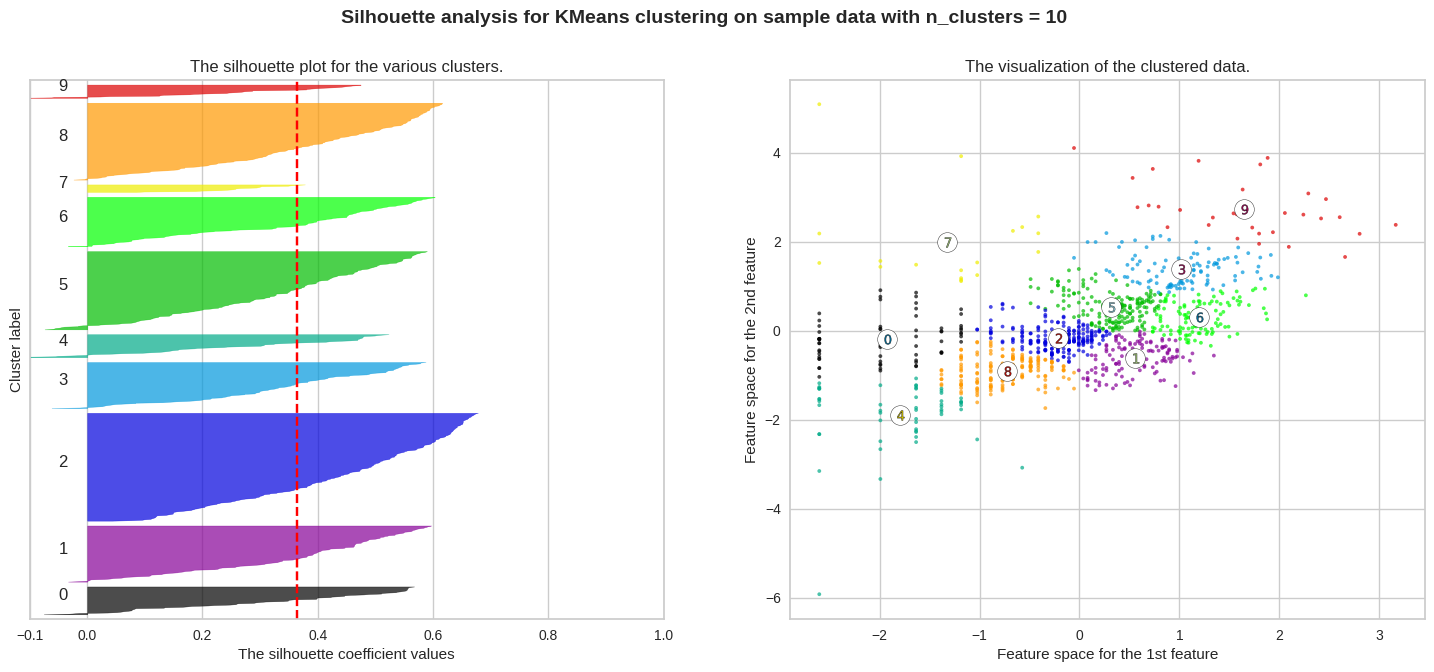

In [222]:

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


* ***Silhouette Plot for Frequency and Monetary with cluster=2 is very good as compared to Recency and Monetary's Silhouette plot.***
* ***No datapoints are on the negative side of the Silhouette Coefficent values(see below image).***

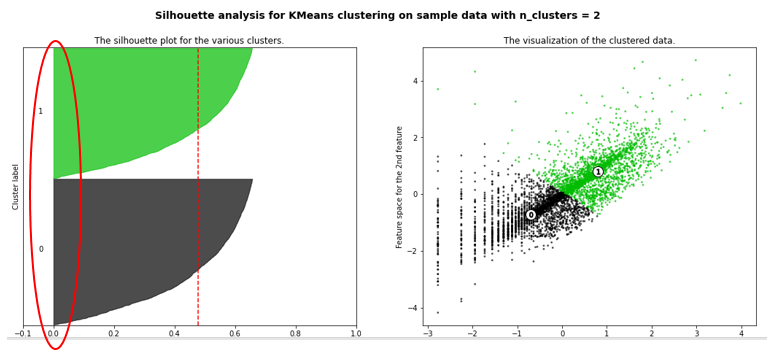

##**So giving n_clusters=2 on Kmeans Model.**

In [223]:
# applying Kmeans_clustering algorithm
kmeans_freq_mon = KMeans(n_clusters=2)
kmeans_freq_mon.fit(X)
y_kmeans= kmeans_freq_mon.predict(X)

In [224]:
#Find the clusters for the observation given in the dataset
rfm_dataframe['Cluster_based_on_freq_mon'] = kmeans_freq_mon.labels_
rfm_dataframe.head(10)

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  1  4  1       141          6   
12347.0         367         31    711.79  4  2  1       421          7   
12348.0         358         17    892.80  2  3  1       231          6   
12356.0         325         36   2271.62  1  2  1       121          4   
12359.0         331         16    547.50  1  3  2       132          6   
12370.0         357         91   1868.02  2  1  1       211          4   
12377.0         354         43   1001.52  2  1  1       211          4   
12383.0         331         68   1251.88  1  1  1       111          3   
12386.0         337         10    401.90  2  4  2       242          8   
12388.0         326         19    431.30  1  3  2       132          6   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  \
CustomerID                                                               
12346.0                 Gold     5.783825       0.000000     11.253942   
12347.0                 Gold     5.905362       3.433987      6.567783   
12348.0                 Gold     5.880533       2.833213      6.794363   
12356.0            Platinaum     5.783825       3.583519      7.728249   
12359.0                 Gold     5.802118       2.772589      6.305362   
12370.0            Platinaum     5.877736       4.510860      7.532634   
12377.0            Platinaum     5.869297       3.761200      6.909274   
12383.0            Platinaum     5.802118       4.219508      7.132402   
12386.0               Silver     5.820083       2.302585      5.996203   
12388.0                 Gold     5.786897       2.944439      6.066804   

            Cluster_based_rec_mon  Cluster_based_on_freq_mon  
CustomerID                                                    
12346.0                         1                          0  
12347.0                         0                          0  
12348.0                         0                          0  
12356.0                         1                          0  
12359.0                         1                          0  
12370.0                         0                          0  
12377.0                         0                          0  
12383.0                         1                          0  
12386.0                         1                          1  
12388.0                         1                          1

In [225]:
# Centers of the clusters(coordinates)
centers = kmeans_freq_mon.cluster_centers_
centers

array([[ 0.75912807,  0.68192095],
       [-0.66664546, -0.59884429]])

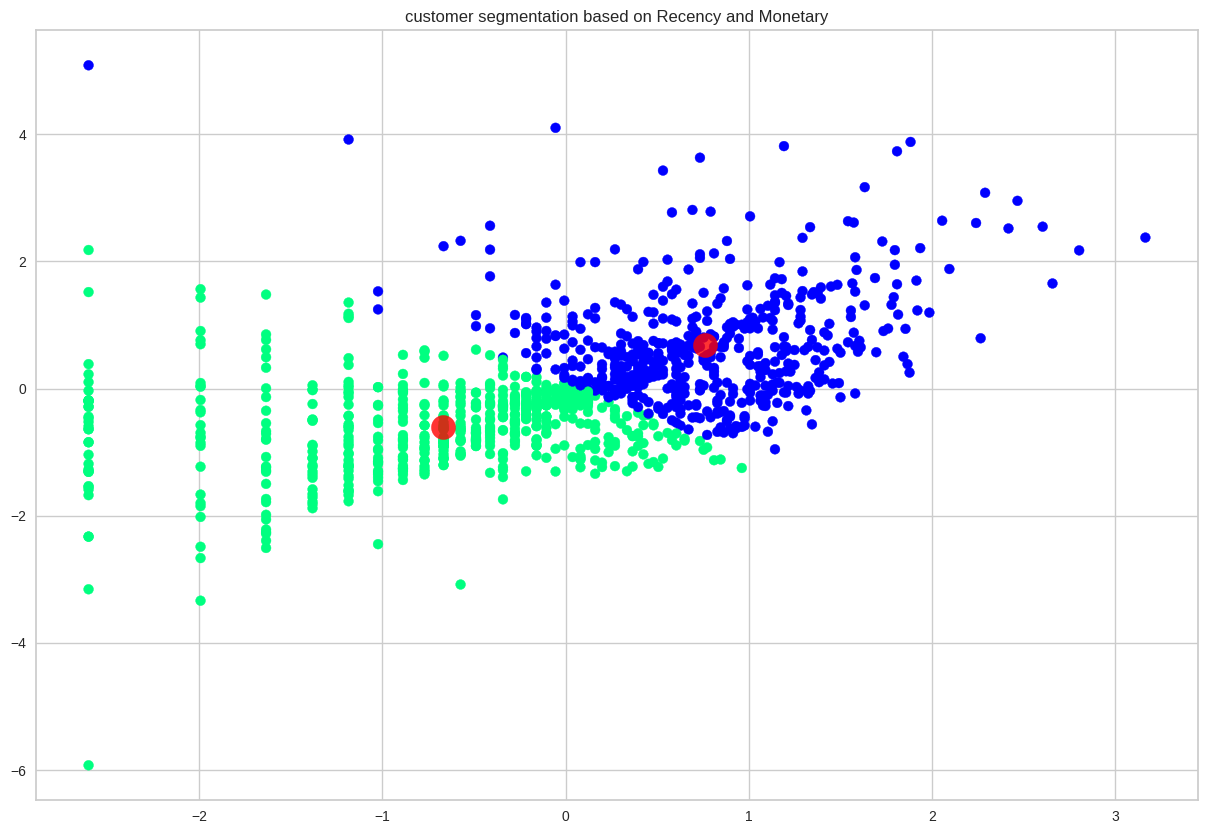

In [226]:
# ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans_freq_mon.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8)

# **2) DBSCAN Algorithm on Frequency and Monetary**

In [227]:
#eps value is the radius value for the datapoint from which circle is drwan and min sample indicates how many datapoints should be consider to consider that point in cluster.
#codesource(sklearn documentation)
db = DBSCAN(eps=0.5, min_samples=15).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 65
Silhouette Coefficient: 0.387


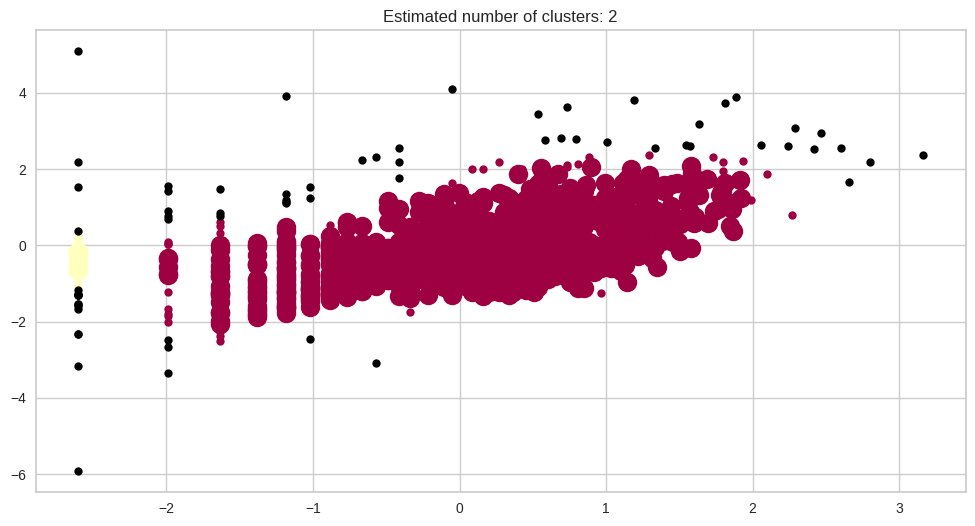

In [228]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(12,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k


    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
    plt.title("Estimated number of clusters: %d" % n_clusters_)

plt.show()

# -------------------------------**Recency,Frequency and Monetary**-------------------

# **1) KMeans Clustering**

***Before implementing the Kmeans Clustering alogorthm we need to decide the number of clusters to put inside algorithm as input. So we will be finding the minmum number of clusters required by using Elbow method.***

#***A) Applying Elbow Method on Recency, Frequency and Monetary.***

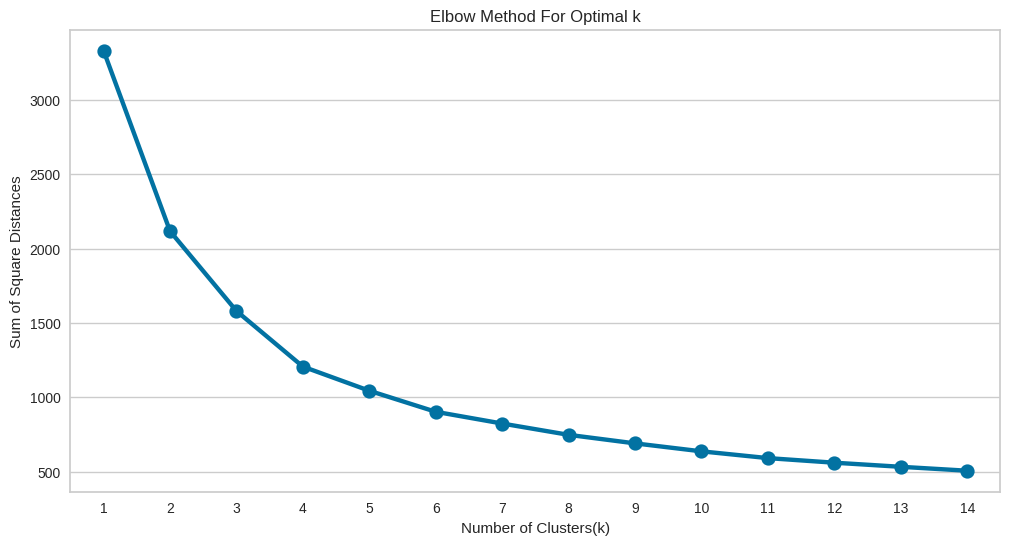

In [229]:
# taking Recency_log, Frequency_log and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_log','Frequency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# **Here we can see that Optimal value for cluster came out to be 2.**

### ***Cross verifying with ElbowVisualizar***

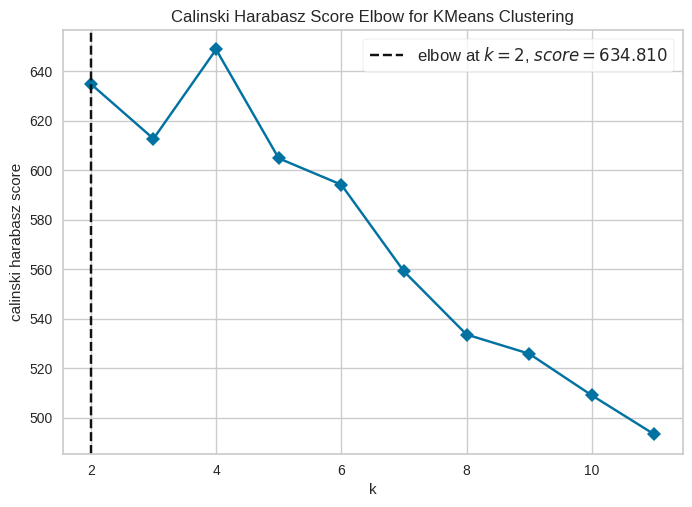

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [230]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Elbow Visulaizer also giving cluster=2

# **Silhouette Score (Validating Above optimal cluster value(i.e optimal_cluster=2)**

In [231]:
# taking Recency_log,Frequency_log and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_log','Frequency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.3518080093829587
For n_clusters = 3, silhouette score is 0.3379649169890392
For n_clusters = 4, silhouette score is 0.35905126295501316
For n_clusters = 5, silhouette score is 0.31949287326749526
For n_clusters = 6, silhouette score is 0.31358953601122264
For n_clusters = 7, silhouette score is 0.30143421736634113
For n_clusters = 8, silhouette score is 0.31114089988231663
For n_clusters = 9, silhouette score is 0.3128348104910932
For n_clusters = 10, silhouette score is 0.29952657414845973
For n_clusters = 11, silhouette score is 0.2964186285687481
For n_clusters = 12, silhouette score is 0.28130373037099016
For n_clusters = 13, silhouette score is 0.27780647892851296
For n_clusters = 14, silhouette score is 0.28273617518993904
For n_clusters = 15, silhouette score is 0.2769963901943382


***Here we can see the for n_cluster=2 silhouette score is good as compared to others.(if values is close to 1 means data points are clustered very well to respective clusters and distance of that datapoint is very far from the other cluster.)***

For n_clusters = 2 The average silhouette_score is : 0.3518080093829587
For n_clusters = 3 The average silhouette_score is : 0.3379649169890392
For n_clusters = 4 The average silhouette_score is : 0.35905126295501316
For n_clusters = 5 The average silhouette_score is : 0.31949287326749526
For n_clusters = 6 The average silhouette_score is : 0.31358953601122264
For n_clusters = 7 The average silhouette_score is : 0.30143421736634113
For n_clusters = 8 The average silhouette_score is : 0.31114089988231663
For n_clusters = 9 The average silhouette_score is : 0.3128348104910932
For n_clusters = 10 The average silhouette_score is : 0.29952657414845973


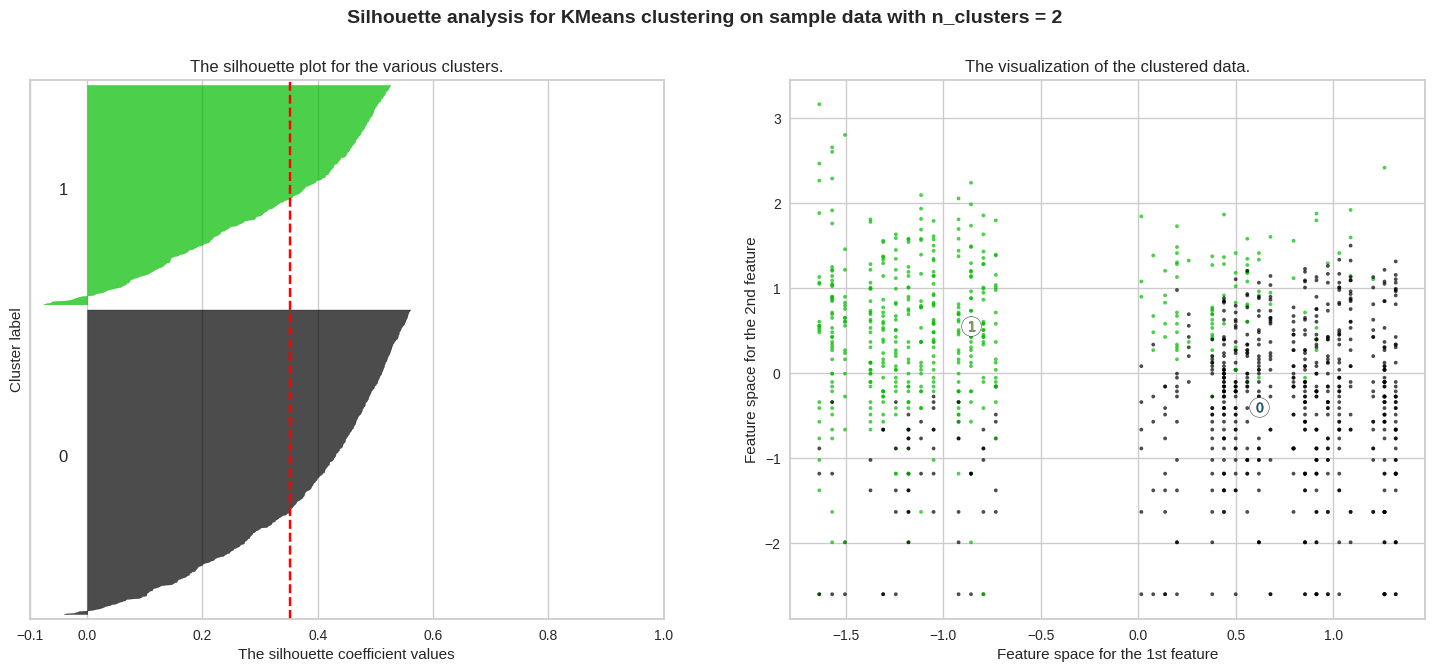

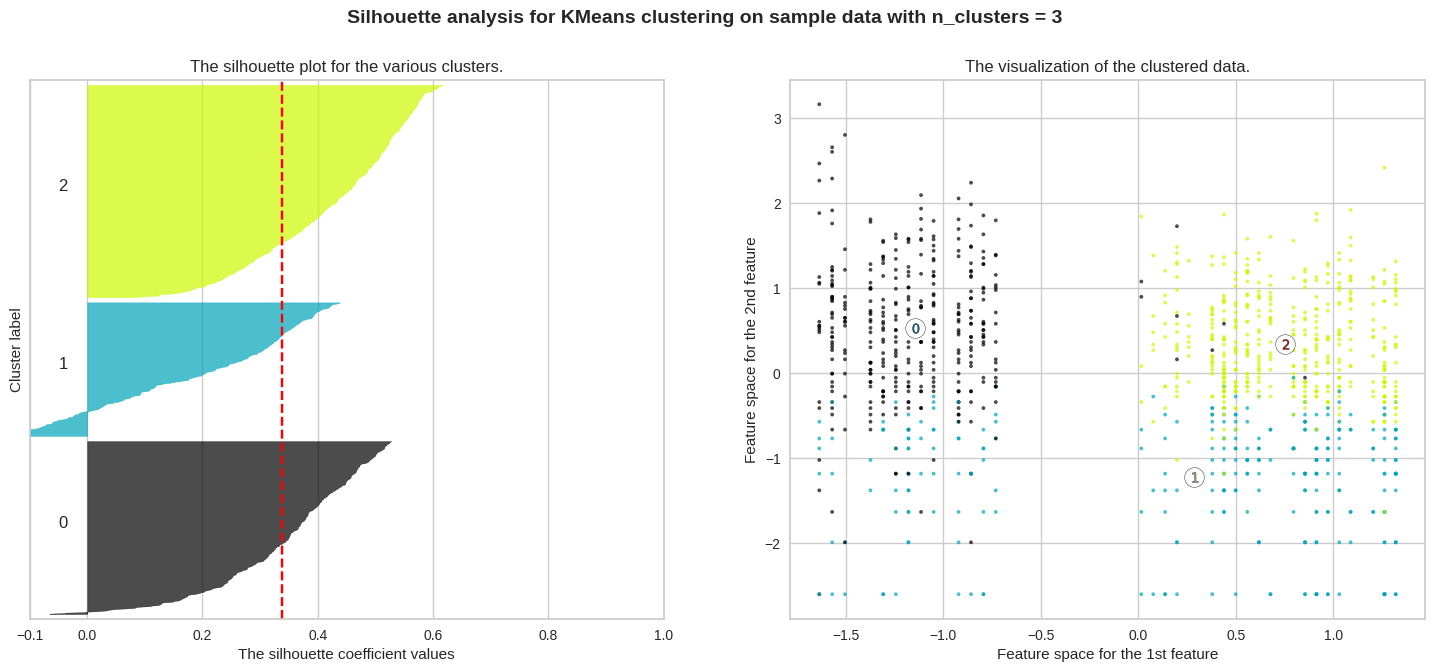

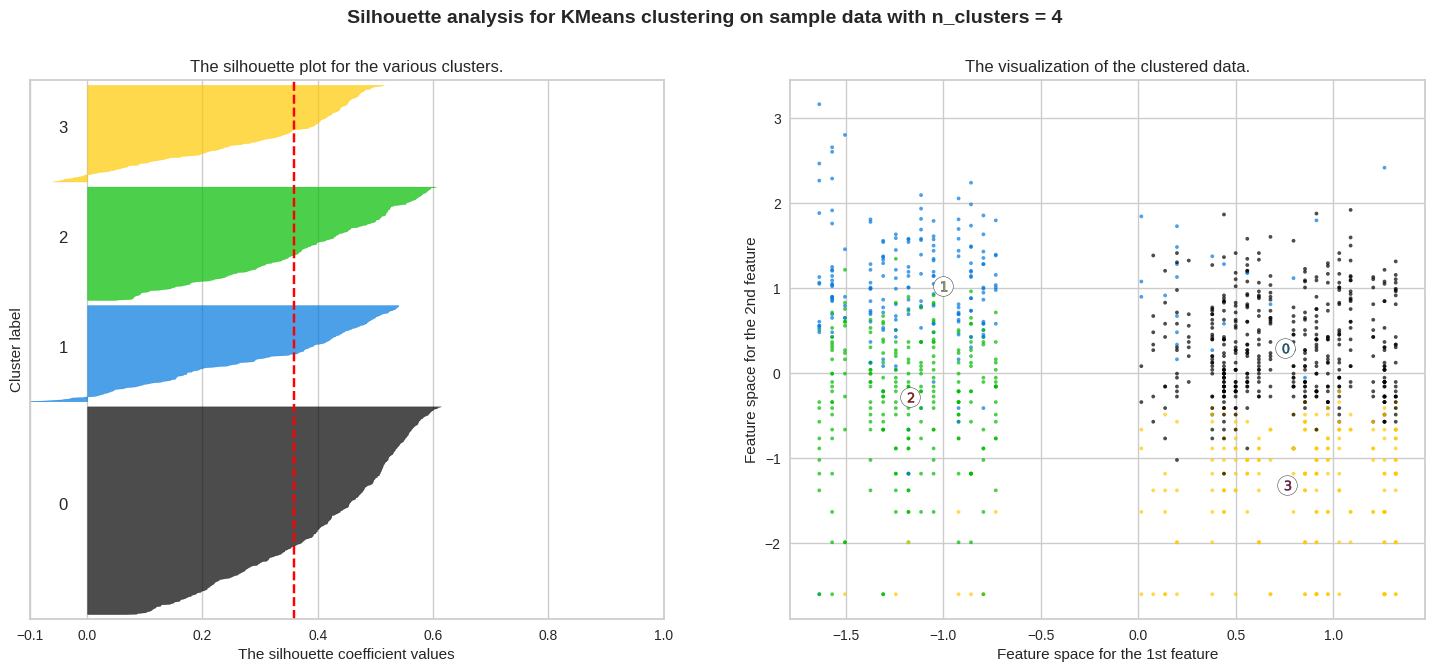

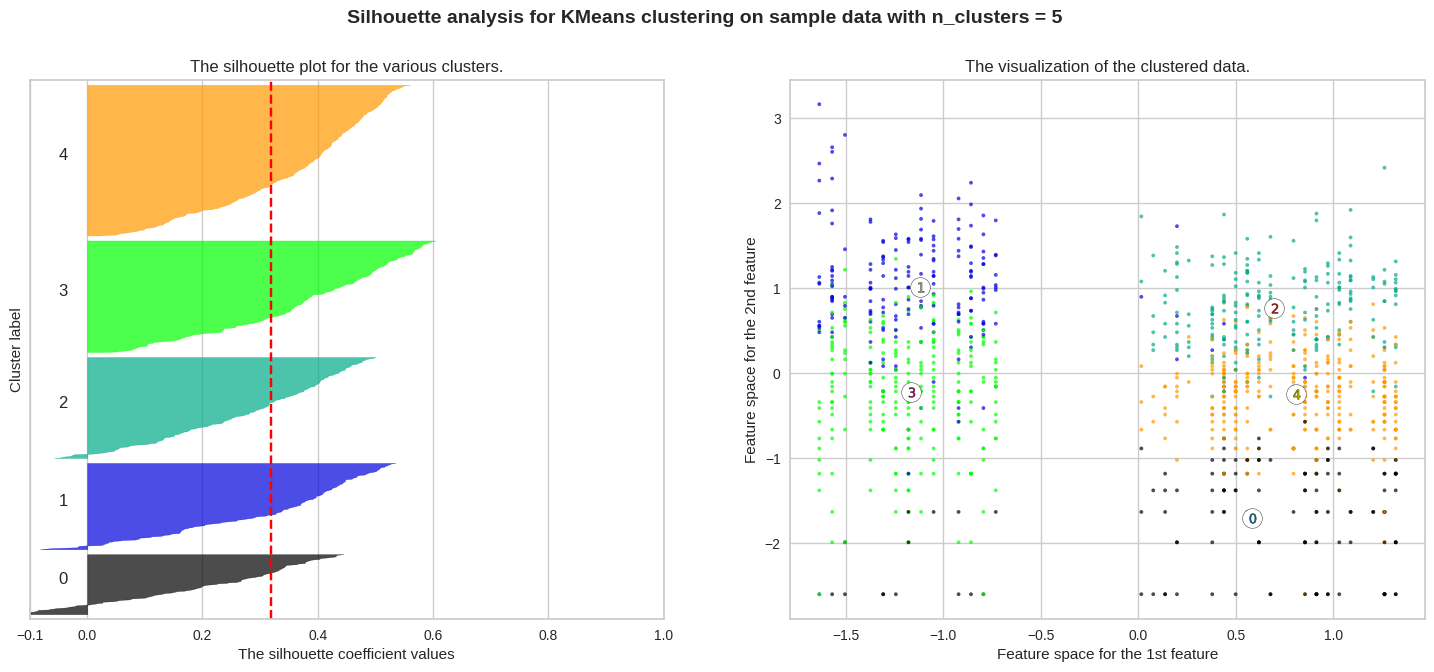

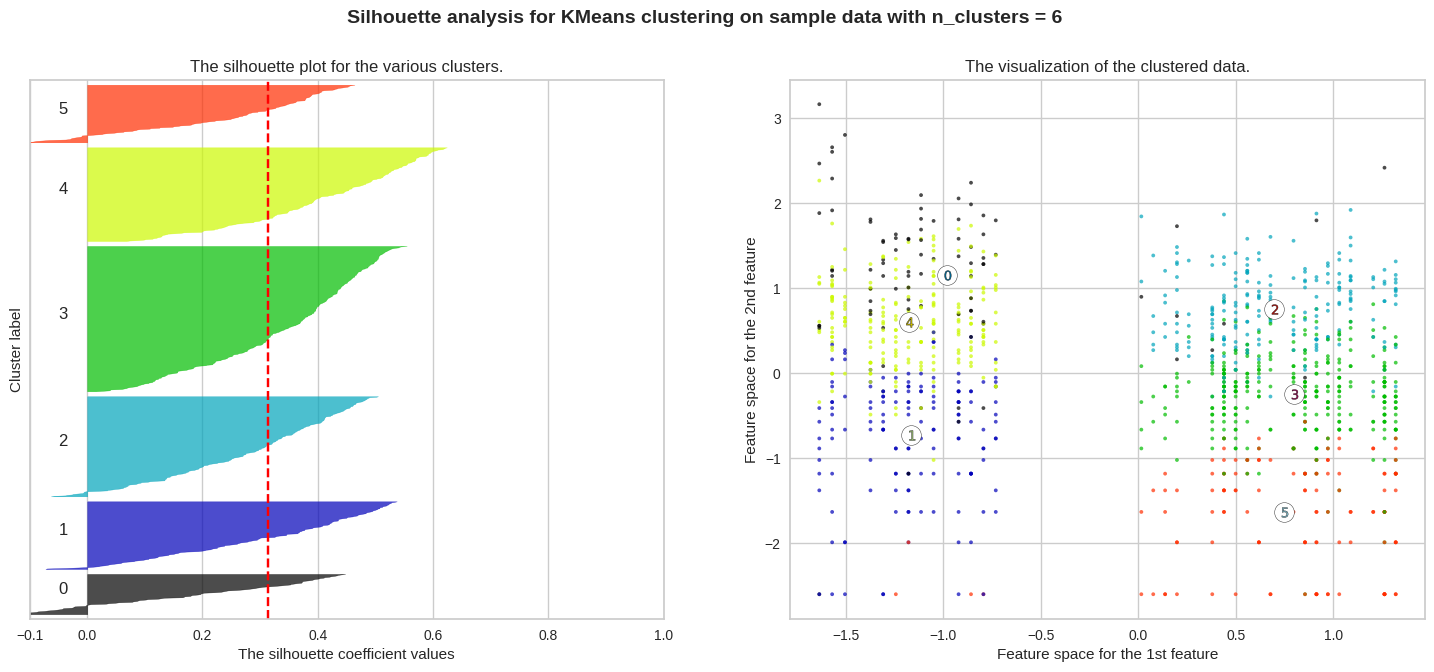

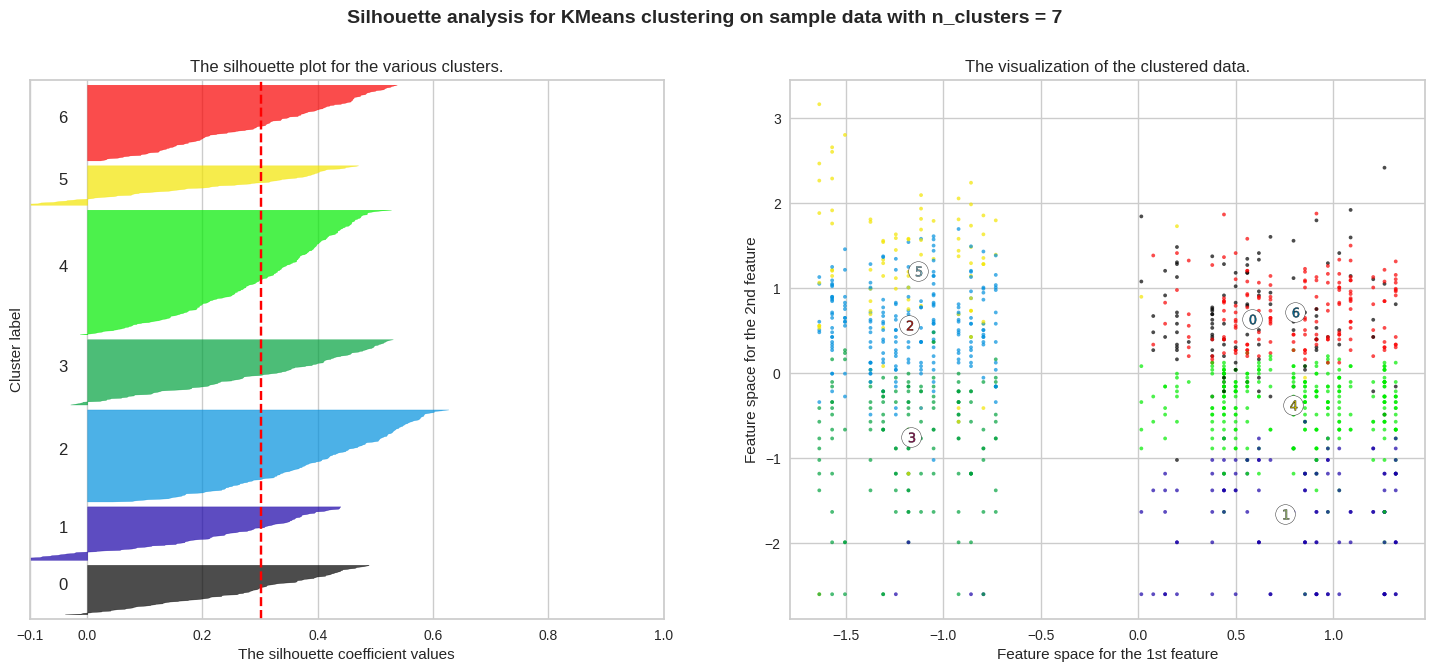

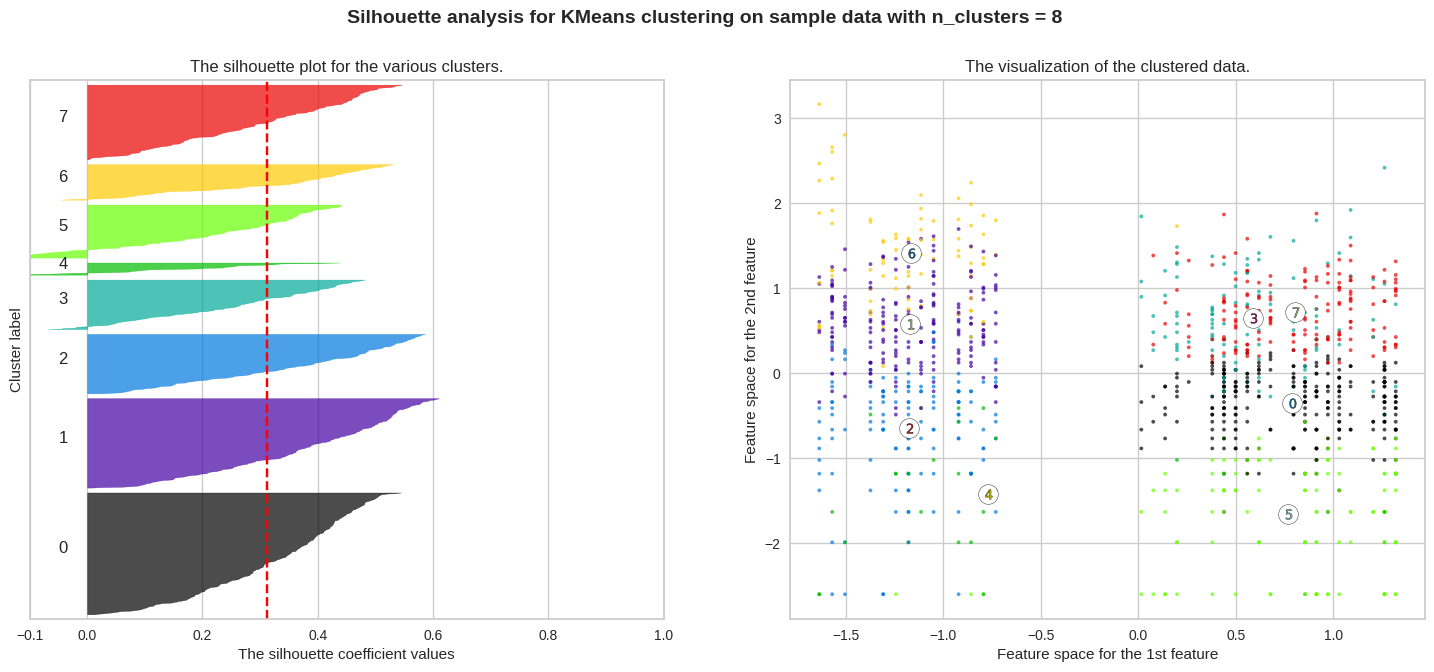

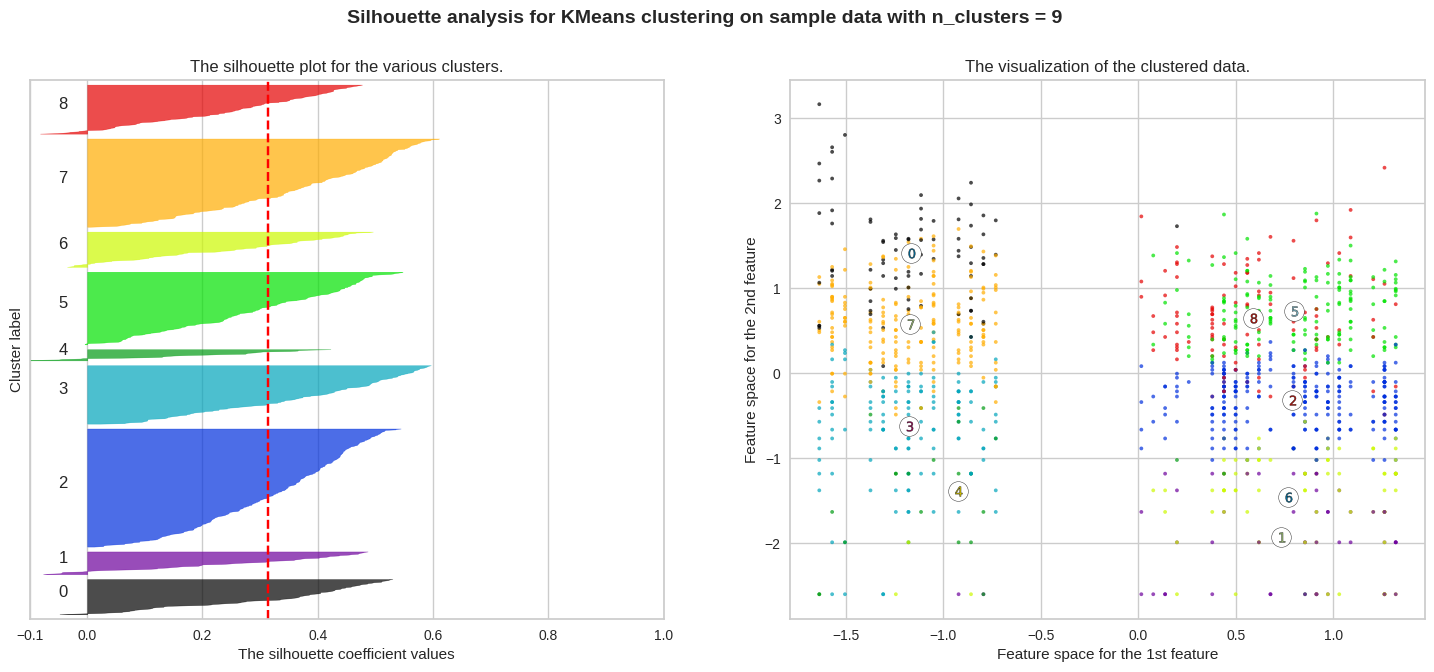

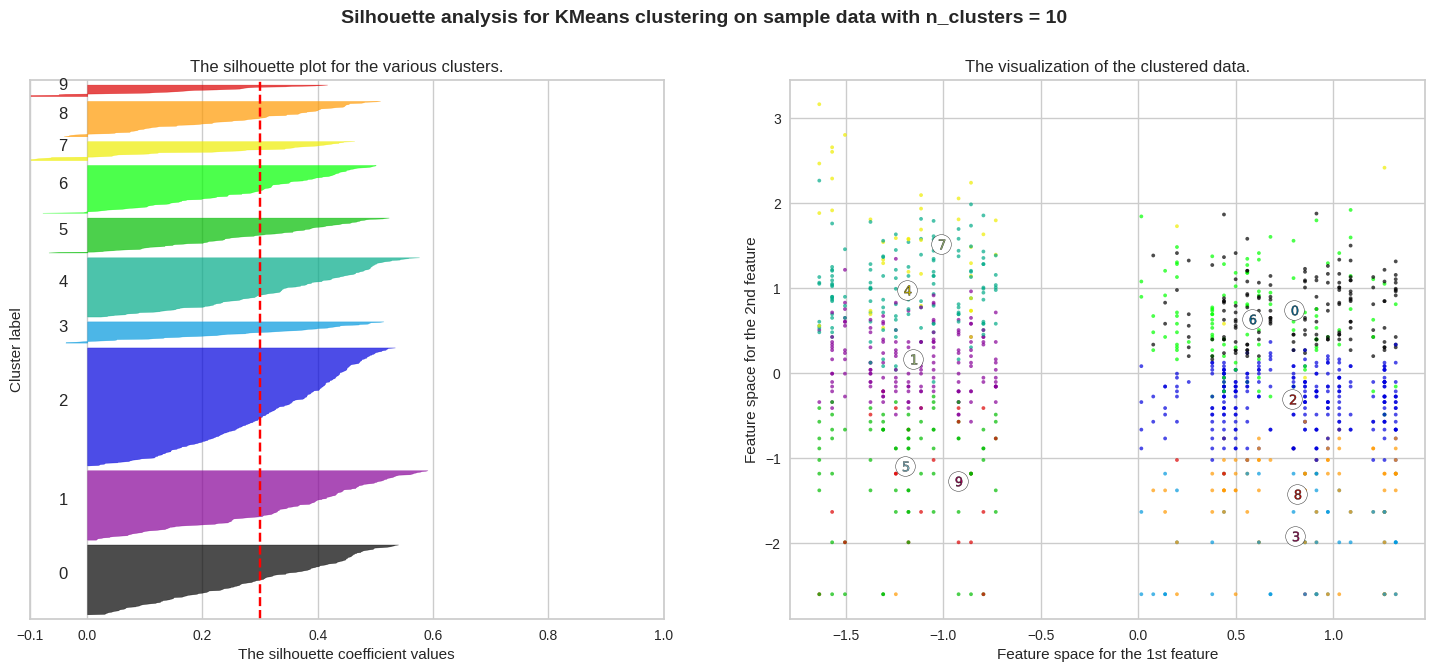

In [232]:

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


* ***Silhouette Plot for Frequency and Monetary with cluster=2 is good.***
* ***Still Few datapoints are on the negative side of the Silhouette Coefficent values(see below image). Still we can consider the clusters***


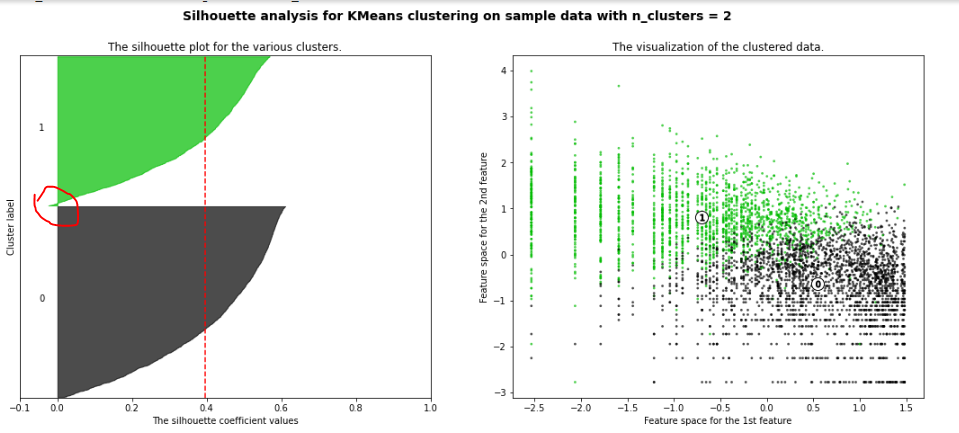

# **So giving n_clusters=2 on Kmeans Model.**

In [233]:
# applying Kmeans_clustering algorithm
kmeans_freq_mon_rec = KMeans(n_clusters=2)
kmeans_freq_mon_rec.fit(X)
y_kmeans= kmeans_freq_mon_rec.predict(X)

In [234]:
#Find the clusters for the observation given in the dataset
rfm_dataframe['Cluster_based_on_freq_mon_rec'] = kmeans_freq_mon_rec.labels_
rfm_dataframe.head(10)

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  1  4  1       141          6   
12347.0         367         31    711.79  4  2  1       421          7   
12348.0         358         17    892.80  2  3  1       231          6   
12356.0         325         36   2271.62  1  2  1       121          4   
12359.0         331         16    547.50  1  3  2       132          6   
12370.0         357         91   1868.02  2  1  1       211          4   
12377.0         354         43   1001.52  2  1  1       211          4   
12383.0         331         68   1251.88  1  1  1       111          3   
12386.0         337         10    401.90  2  4  2       242          8   
12388.0         326         19    431.30  1  3  2       132          6   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  \
CustomerID                                                               
12346.0                 Gold     5.783825       0.000000     11.253942   
12347.0                 Gold     5.905362       3.433987      6.567783   
12348.0                 Gold     5.880533       2.833213      6.794363   
12356.0            Platinaum     5.783825       3.583519      7.728249   
12359.0                 Gold     5.802118       2.772589      6.305362   
12370.0            Platinaum     5.877736       4.510860      7.532634   
12377.0            Platinaum     5.869297       3.761200      6.909274   
12383.0            Platinaum     5.802118       4.219508      7.132402   
12386.0               Silver     5.820083       2.302585      5.996203   
12388.0                 Gold     5.786897       2.944439      6.066804   

            Cluster_based_rec_mon  Cluster_based_on_freq_mon  \
CustomerID                                                     
12346.0                         1                          0   
12347.0                         0                          0   
12348.0                         0                          0   
12356.0                         1                          0   
12359.0                         1                          0   
12370.0                         0                          0   
12377.0                         0                          0   
12383.0                         1                          0   
12386.0                         1                          1   
12388.0                         1                          1   

            Cluster_based_on_freq_mon_rec  
CustomerID                                 
12346.0                                 0  
12347.0                                 1  
12348.0                                 1  
12356.0                                 0  
12359.0                                 0  
12370.0                                 0  
12377.0                                 0  
12383.0                                 0  
12386.0                                 0  
12388.0                                 0

In [235]:
# Centers of the clusters(coordinates)
centers = kmeans_freq_mon_rec.cluster_centers_
centers

array([[-0.85583574,  0.55870271,  0.68226043],
       [ 0.61928487, -0.40427867, -0.49368534]])

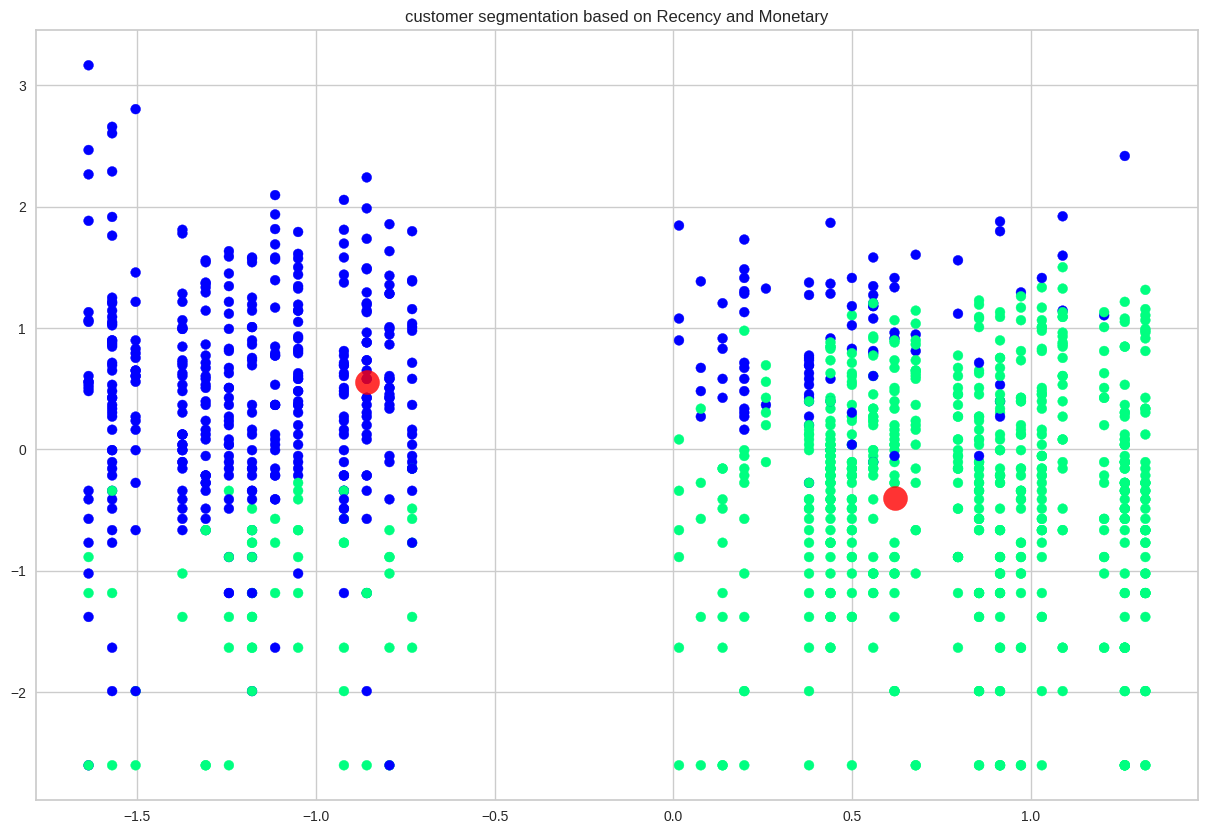

In [236]:
# ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans_freq_mon_rec.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8)

# **2) DBSCAN Algorithm on Recency,Frequency and Monetary**

In [237]:
#eps value is the radius value for the datapoint from which circle is drwan and min sample indicates how many datapoints should be consider to consider that point in cluster.
#codesource(sklearn documentation)
db = DBSCAN(eps=0.5, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 125
Silhouette Coefficient: 0.296


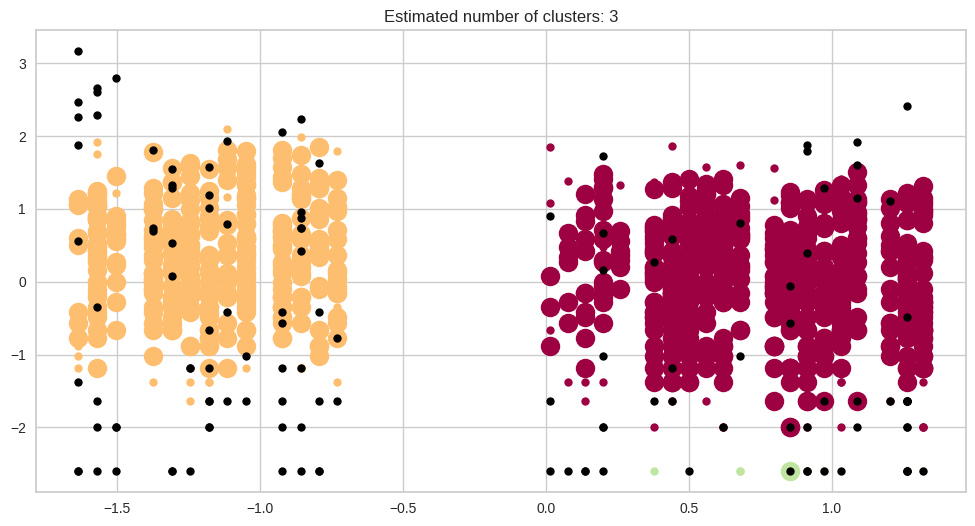

In [238]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(12,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k


    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)

plt.show()


# **Hierarchical Clustering**

## <b> How should we Choose the Number of Clusters in Hierarchical Clustering? </b>

### A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.

### We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line. Find largest vertical distance we can make without crossing any other horizontal line).

In [239]:
import scipy.cluster.hierarchy as sch

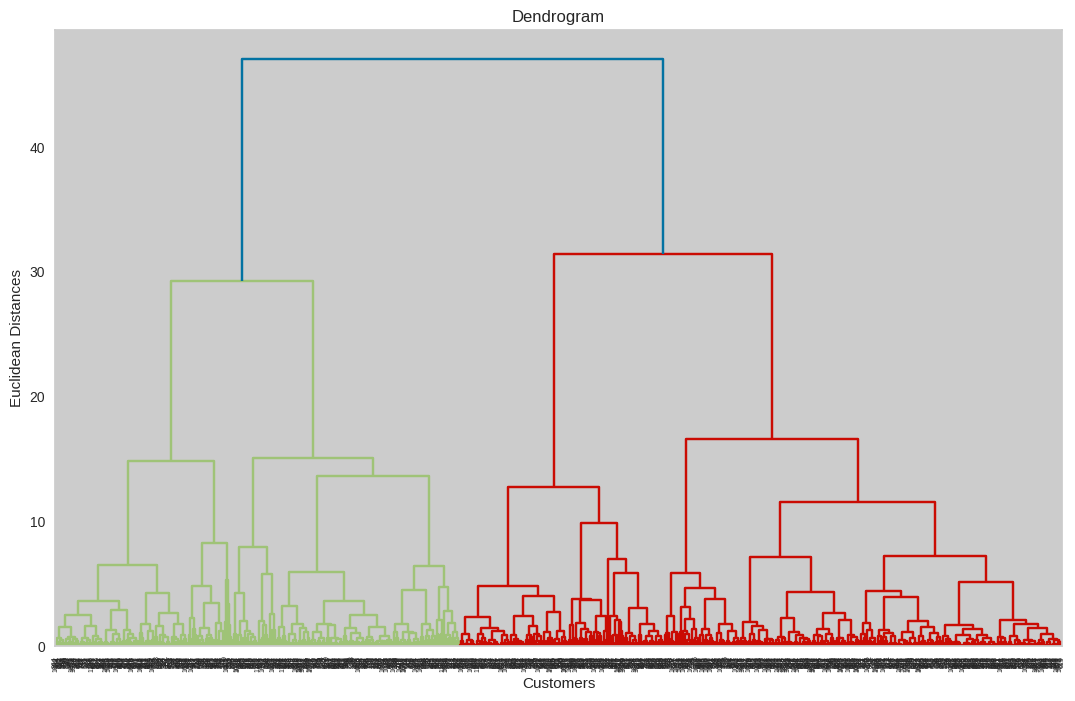

In [240]:
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=80, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

### <b> The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold. </b>

### No. of Cluster  = 2

In [241]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
h_clustering = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = h_clustering.fit_predict(X)

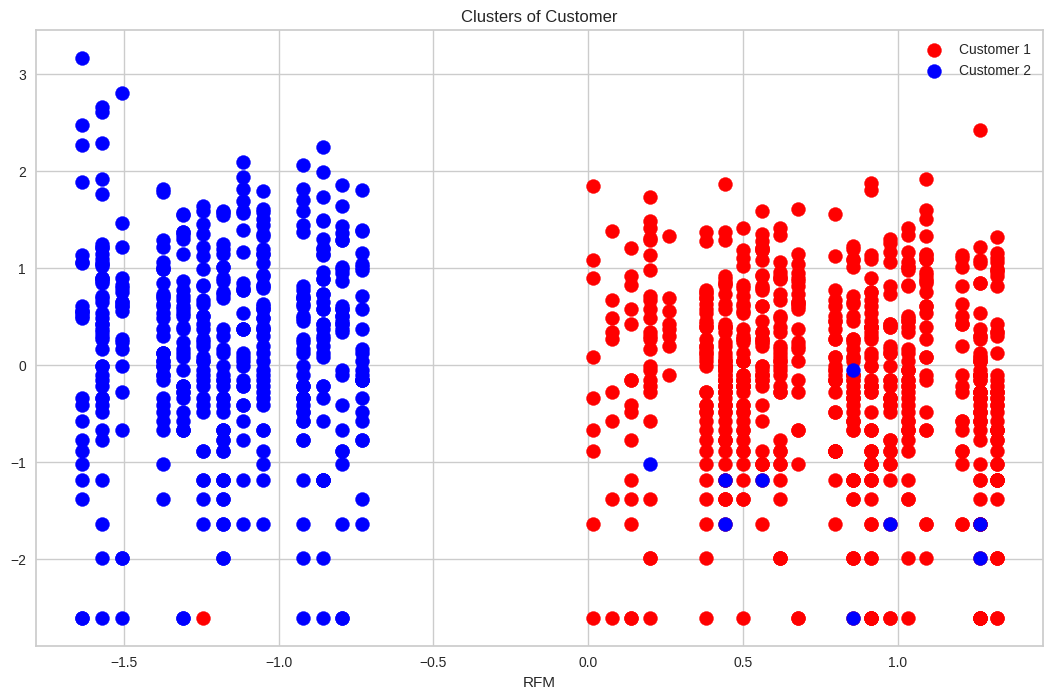

In [242]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.legend()
plt.show()

In [243]:
rfm_dataframe.head(1)

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1   77183.6  1  4  1       141          6   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  \
CustomerID                                                               
12346.0                 Gold     5.783825            0.0     11.253942   

            Cluster_based_rec_mon  Cluster_based_on_freq_mon  \
CustomerID                                                     
12346.0                         1                          0   

            Cluster_based_on_freq_mon_rec  
CustomerID                                 
12346.0                                 0

In [244]:
data_process_normalized=rfm_dataframe[['Recency','Frequency','Monetary','Recency_log','Frequency_log','Monetary_log','RFM_Loyalty_Level','Cluster_based_on_freq_mon_rec']]

In [245]:
data_process_normalized.groupby('Cluster_based_on_freq_mon_rec').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

Recency            Frequency           \
                                     mean  min  max       mean min  max   
Cluster_based_on_freq_mon_rec                                             
0                              337.230108  325  372  53.922581   1  693   
1                              361.127132  325  373  19.072868   1  105   

                                  Monetary                         
                                      mean     min      max count  
Cluster_based_on_freq_mon_rec                                      
0                              1611.104473  108.45  77183.6   465  
1                               302.789333    0.85   3794.4   645

# **Summary And Conclusion of project**

* ### ***Firstly we did clustering based on RFM analysis. We had 4 clusters/Segmentation of customers based on RFM score.***
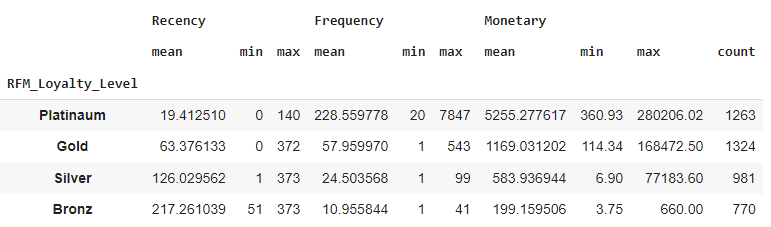

  * Platinum customers=1263 ( less recency but high  frequency and heavy spendings)
  * Gold customers=1324 (good recency,frequncy and moentary)
  * Silver customers=981(high recency, low frequency and low spendings)
  * Bronz customers=770 (very high recency but very less frequency and spendings)

* ### ***Later we implemented the machine learning algorithms to cluster the customers.***

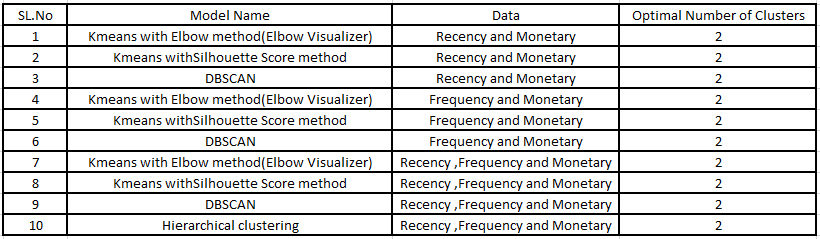

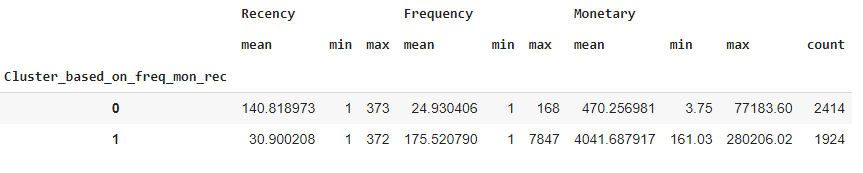

* ***Above clustering is done with recency,frequency and monetary data(Kmeans Clustering) as all 3 together will provide more information.***

* ***Cluster 0 has high recency rate but very low frequency and monetary. Cluster 0 conatins 2414 customers.***
* ***Cluster 1 has low recency rate but they are frequent buyers and spends  very high money than other customers as mean monetary value is very high.Thus generates more revnue to the retail business***


***With this, we are done.Also, we can use more robust analysis for the clustering, using not only RFM but other metrics such as demographics or product features.***